In [3]:
#adapted from Kaggle (simple LSTM for text classification)
#https://www.kaggle.com/kredy10/simple-lstm-for-text-classification

from __future__ import print_function

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model, Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Flatten, Input, Embedding, \
                        Bidirectional, Convolution1D, Conv1D, MaxPooling1D, Input, merge, concatenate
from keras.optimizers import Adam, Adadelta
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical, generic_utils
from keras.callbacks import EarlyStopping

# For the recurrent CNN
# np.random.seed(3435)  # for reproducibility, should be first
from keras.regularizers import l2
from keras.layers.recurrent import LSTM, GRU, SimpleRNN
from keras.constraints import maxnorm
# from keras.datasets import imdb
from keras import callbacks
from keras.models import Model
import time

Using TensorFlow backend.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14106 entries, 0 to 14105
Data columns (total 12 columns):
entry        14106 non-null int64
KUDOS        14106 non-null int64
TAGS         14106 non-null object
ID_NUMBER    14106 non-null int64
TEXT         14106 non-null object
TITLE        14106 non-null object
WORDCOUNT    14106 non-null int64
MAINTAG      14106 non-null object
SUMMARY      13044 non-null object
COMMENTS     14106 non-null int64
DATE         14106 non-null object
BOOKMARKS    14106 non-null int64
dtypes: int64(6), object(6)
memory usage: 1.3+ MB


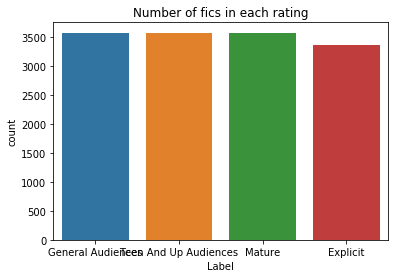

In [4]:
# read in data
df = pd.read_csv("records.tsv",delimiter='\t',encoding='latin-1')
df.head()
df.info()

# plot
sns.countplot(df.MAINTAG)
plt.xlabel('Label')
plt.title('Number of fics in each rating')
plt.show()

In [7]:
# get input and label vectors
X = df.TEXT
print(X.shape)

Y = df.MAINTAG
print(Y.shape)

le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

print(Y.shape)
print(X[1])
print(Y)

(14106,)
(14106,)
(14106, 1)
Jughead never had a favorite color, sure most people would assume it's back since it's the color he ever wore. But Jughead never did really care for having a favorite. 
  
   His world had always been gray. And black, lifeless.  
  
   Then Came Veronica Lodge. 
  
   Veronica Lodge wasâ¦  
   
     purple. 
   
  
   She was lavender, she was violet. The first color he would associate her with is of course purple. 
  
   Soon there's blue sky's in his world again, green grass and red roses. 
  
   on a summer night, nearing the end of their first official date. She laughs and snaps her fingers yelling out  
   
     'purple!'  
   
   When she asked to guess his favorite color, not having a clue he didn't have one. 
  
   Jughead smiled and nodded, watching her laugh and and be happy that she got it right. 
  
   Jughead very much, loved purple.
[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


In [23]:
#split into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
Y_train = to_categorical(Y_train, num_classes=4) # one-hot
Y_test = to_categorical(Y_test, num_classes=4) # one-hot

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(11284,)
(11284, 4)
(2822,)
(2822, 4)


In [24]:
# using summary
Xs = df.SUMMARY

#split into training and test sets
Xs_train, Xs_test, Ys_train, Ys_test = train_test_split(Xs, Y, test_size=0.2)
Ys_train = to_categorical(Ys_train, num_classes=4) # one-hot
Ys_test = to_categorical(Ys_test, num_classes=4) # one-hot

print(Xs_train.shape)
print(Ys_train.shape)
print(Xs_test.shape)
print(Ys_test.shape)

(11284,)
(11284, 4)
(2822,)
(2822, 4)


In [16]:
# take both columns
XX =  df[['TEXT','SUMMARY', 'TAGS']]
print(XX.shape)

# convert to list
XXl = XX.values.tolist()

(14106, 2)


In [27]:
print(type(X[1]))
print(type(Xs[1]))

print(type(X))
print(type(Xs))

print(type(X_train))
print(type(Xs_train))

print(type(X_train[1])) # errors somtimes
print(type(Xs_train[1]))

<class 'str'>
<class 'str'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'str'>
<class 'str'>


In [28]:
# parameters, for TEXT
max_len = 220
tok = Tokenizer(lower=True) # default
tok.fit_on_texts(X_train) # str(X_train)?
max_words = len(tok.word_index.items()) + 1 # vocal size, all words from all these stories? seems very small
print(max_words)

64513


In [29]:
# parameters, for SUMMARY
max_lens = 50
toks = Tokenizer(lower=True) # default lower case = true
#toks.fit_on_texts(str(Xs_train)) # str(X_train)
toks.fit_on_texts(Xs_train.to_list()) # str(X_train)
max_wordss = len(toks.word_index.items()) + 1 # vocal size, all words from all these stories? seems very small
print(max_wordss)

AttributeError: 'float' object has no attribute 'lower'

In [30]:
tok.word_docs

defaultdict(int,
            {'feel': 1155,
             'of': 9055,
             'but': 5837,
             'there': 2303,
             'again': 1749,
             'better': 786,
             'been': 2038,
             'please': 680,
             'realm': 11,
             'in': 8488,
             'alone': 478,
             'have': 3165,
             'me': 3299,
             'now': 2314,
             "shouldn't": 176,
             'usually': 142,
             'him': 5361,
             'saw': 499,
             'pleaded': 34,
             'had': 3514,
             'meaning': 50,
             "hadn't": 407,
             'adventure': 47,
             'guy': 184,
             'see': 1509,
             'her': 3797,
             'she': 3442,
             'time': 2499,
             'real': 288,
             "don't": 1751,
             'long': 1334,
             'aqua': 4,
             'that': 6816,
             "mickey's": 4,
             'darkness': 206,
             'friends': 330,
          

In [31]:
# get glove embeddings

embeddings_index = dict()
f = open('glove.6B.100d.txt', encoding="utf8")

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
    
f.close()
embedding_matrix = np.zeros((max_words,100))

for word,i in tok.word_index.items():
    print(word)
    print(i)
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

the
1
and
2
to
3
his
4
a
5
he
6
of
7
you
8
'
9
in
10
her
11
it
12
i
13
was
14
that
15
she
16
as
17
â 
18
him
19
on
20
with
21
for
22
is
23
but
24
at
25
this
26
had
27
they
28
not
29
be
30
up
31
me
32
my
33
so
34
when
35
out
36
like
37
from
38
your
39
all
40
into
41
one
42
just
43
back
44
have
45
what
46
eyes
47
no
48
down
49
are
50
them
51
their
52
would
53
over
54
it's
55
do
56
if
57
time
58
said
59
by
60
were
61
could
62
then
63
there
64
more
65
now
66
can
67
about
68
know
69
love
70
before
71
an
72
or
73
been
74
how
75
hand
76
around
77
never
78
will
79
too
80
even
81
against
82
only
83
don't
84
i'm
85
get
86
head
87
we
88
again
89
way
90
still
91
other
92
face
93
hands
94
didn't
95
he's
96
through
97
here
98
'i
99
off
100
see
101
after
102
want
103
has
104
who
105
lips
106
did
107
than
108
away
109
right
110
go
111
fingers
112
much
113
always
114
something
115
because
116
little
117
make
118
good
119
himself
120
mouth
121
first
122
bed
123
think
124
long
125
come
126
body
127
some


1097
beauty
1098
screamed
1099
reaches
1100
fault
1101
'do
1102
minute
1103
17
1104
expected
1105
age
1106
wonderful
1107
wrist
1108
chocolate
1109
'this
1110
placed
1111
rain
1112
hurts
1113
chin
1114
important
1115
panting
1116
bathroom
1117
jared
1118
broke
1119
slipped
1120
itself
1121
gay
1122
brown
1123
loki
1124
curled
1125
silver
1126
fit
1127
lightly
1128
shower
1129
brain
1130
'if
1131
surprised
1132
ended
1133
scott
1134
fighting
1135
metal
1136
gotten
1137
nails
1138
older
1139
thumb
1140
other's
1141
steady
1142
usual
1143
missed
1144
share
1145
ways
1146
comfort
1147
malfoy
1148
nights
1149
lust
1150
regina
1151
wife
1152
strength
1153
pushes
1154
scared
1155
drop
1156
blade
1157
we'll
1158
order
1159
star
1160
press
1161
city
1162
battle
1163
â¦
1164
'that's
1165
notice
1166
tip
1167
blanket
1168
keith
1169
paper
1170
sent
1171
girls
1172
spoke
1173
opens
1174
weeks
1175
sea
1176
spine
1177
fair
1178
beat
1179
man's
1180
stretched
1181
places
1182
thrusts
1183
thin
1184

panties
1847
sucks
1848
heartbeat
1849
jason
1850
100
1851
breaks
1852
leo
1853
energy
1854
delicate
1855
distance
1856
boss
1857
kara
1858
rising
1859
loss
1860
becomes
1861
extra
1862
gripped
1863
paused
1864
rise
1865
absolutely
1866
kurt
1867
charles
1868
request
1869
seriously
1870
tease
1871
precious
1872
afterwards
1873
arousal
1874
frozen
1875
tastes
1876
among
1877
particular
1878
purred
1879
phil
1880
slammed
1881
brothers
1882
faces
1883
shake
1884
burst
1885
tumblr
1886
sunlight
1887
difficult
1888
lit
1889
author's
1890
nc
1891
sink
1892
earlier
1893
wore
1894
speaking
1895
pocket
1896
dan
1897
catches
1898
shift
1899
led
1900
stronger
1901
flower
1902
pleased
1903
beach
1904
deserve
1905
professor
1906
'sorry
1907
road
1908
pounding
1909
candy
1910
9
1911
voices
1912
trip
1913
fin
1914
coat
1915
clint
1916
catching
1917
grass
1918
drag
1919
waking
1920
bored
1921
toes
1922
bliss
1923
damned
1924
louder
1925
crowd
1926
asshole
1927
shivers
1928
hux
1929
romantic
1930
veins

shade
2847
liquid
2848
rubs
2849
ordered
2850
fan
2851
million
2852
pillows
2853
headboard
2854
f
2855
glancing
2856
double
2857
dressing
2858
respect
2859
pile
2860
band
2861
sleepy
2862
pie
2863
here's
2864
card
2865
bruise
2866
mrs
2867
alcohol
2868
avengers
2869
logan
2870
teddy's
2871
flew
2872
jesse
2873
raise
2874
replaced
2875
shield
2876
boring
2877
yesterday
2878
james'
2879
monsters
2880
colors
2881
snake
2882
pregnant
2883
corners
2884
target
2885
zeke
2886
problems
2887
tips
2888
weasley
2889
shepard
2890
fragile
2891
clouds
2892
um
2893
embarrassed
2894
halfway
2895
whip
2896
stephen
2897
tas
2898
illya
2899
capable
2900
grunted
2901
likely
2902
track
2903
jensen's
2904
links
2905
tub
2906
revenge
2907
shrugs
2908
anyways
2909
boop
2910
courage
2911
student
2912
unexpected
2913
uncomfortable
2914
snapping
2915
scattered
2916
refused
2917
curves
2918
opposite
2919
harm
2920
poured
2921
ruined
2922
straining
2923
desires
2924
snap
2925
eternity
2926
drank
2927
revealed
2928

3846
laptop
3847
feedback
3848
candles
3849
crap
3850
jessica
3851
justice
3852
previous
3853
kevin
3854
lexa
3855
freeze
3856
entering
3857
anders
3858
riku
3859
unity
3860
straddling
3861
struggle
3862
relationships
3863
multiple
3864
heroes
3865
rogers
3866
routine
3867
shouting
3868
prey
3869
cave
3870
court
3871
palace
3872
tilting
3873
who'd
3874
adds
3875
stress
3876
pointing
3877
connected
3878
wars
3879
army
3880
'tell
3881
'in
3882
board
3883
slightest
3884
blushes
3885
foolish
3886
furious
3887
prize
3888
scarlet
3889
stray
3890
swim
3891
bold
3892
wildly
3893
mentioned
3894
advice
3895
potions
3896
aches
3897
dim
3898
clench
3899
tilts
3900
merry
3901
hannibal's
3902
james's
3903
ray's
3904
noticing
3905
fashion
3906
dreamed
3907
similar
3908
utter
3909
'get
3910
worries
3911
'alright
3912
blowing
3913
cabin
3914
fiction
3915
peggy
3916
melting
3917
05
3918
gleam
3919
virgin
3920
clung
3921
incredibly
3922
violently
3923
habit
3924
swiftly
3925
intoxicating
3926
exciting
39

4846
grinds
4847
mistakes
4848
behavior
4849
pins
4850
temperature
4851
blowjob
4852
terrifying
4853
ceased
4854
sped
4855
vibrator
4856
â and
4857
curiously
4858
helplessly
4859
instinct
4860
cookies
4861
argument
4862
alternate
4863
needle
4864
brendon
4865
prevent
4866
crumpled
4867
wounded
4868
farther
4869
beads
4870
heel
4871
smeared
4872
gender
4873
finishes
4874
console
4875
insides
4876
instincts
4877
todoroki
4878
abuse
4879
included
4880
possessive
4881
yoshiko
4882
project
4883
cersei
4884
hannah
4885
rowling
4886
territory
4887
handcuffs
4888
gotham
4889
38
4890
sharon
4891
surprising
4892
luckily
4893
karkat
4894
â
4895
fades
4896
slam
4897
pausing
4898
haunt
4899
stir
4900
endure
4901
jordan
4902
elevator
4903
heavenly
4904
lew
4905
healthy
4906
offended
4907
ivory
4908
canvas
4909
apologize
4910
den
4911
theme
4912
contain
4913
embraced
4914
jayne
4915
counted
4916
tingle
4917
resistance
4918
century
4919
regardless
4920
mild
4921
buffy's
4922
backed
4923
headache
492

'hmm
5596
delivered
5597
'can't
5598
ellie
5599
chambers
5600
brighter
5601
charms
5602
dizzy
5603
'um
5604
crowds
5605
petting
5606
sniffed
5607
contents
5608
traveled
5609
neat
5610
semi
5611
adventures
5612
booze
5613
impression
5614
gagged
5615
messages
5616
drunken
5617
walker
5618
sheriff
5619
possessed
5620
grimaced
5621
teasingly
5622
realizing
5623
wickedly
5624
identity
5625
'em
5626
claiming
5627
flirt
5628
drying
5629
nipped
5630
sold
5631
regretted
5632
gladly
5633
gravity
5634
halo
5635
fascinating
5636
soda
5637
instructed
5638
rosy
5639
spanked
5640
pose
5641
mysteries
5642
program
5643
occasional
5644
trickling
5645
massaged
5646
amongst
5647
separated
5648
reassuring
5649
banging
5650
pretends
5651
pumped
5652
ankle
5653
fireplace
5654
concert
5655
torment
5656
58
5657
protection
5658
57
5659
sensei
5660
forearm
5661
rim
5662
reindeer
5663
ladies
5664
conversations
5665
smacked
5666
sacred
5667
beams
5668
zeke's
5669
bobbing
5670
paws
5671
claims
5672
'she's
5673
theo

bo
6492
temples
6493
blindfolded
6494
bathing
6495
introduce
6496
worthington
6497
straightened
6498
silvery
6499
congratulations
6500
cheered
6501
todd
6502
chained
6503
directed
6504
unfamiliar
6505
basic
6506
nudge
6507
sho
6508
poe's
6509
tend
6510
options
6511
garbage
6512
grease
6513
viggo's
6514
underside
6515
villains
6516
'everything
6517
fisted
6518
etched
6519
world's
6520
â»
6521
values
6522
recordings
6523
username
6524
2014
6525
'morning
6526
vomit
6527
liquor
6528
peeked
6529
grit
6530
bondage
6531
blinded
6532
ought
6533
species
6534
craving
6535
kills
6536
sack
6537
insult
6538
bees
6539
raphael
6540
alexander's
6541
'seriously
6542
fearful
6543
clearing
6544
mates
6545
wrinkled
6546
attitude
6547
spy
6548
polite
6549
boyd
6550
equipment
6551
bumps
6552
thisâ¦
6553
nudging
6554
em
6555
starlight
6556
ed's
6557
regarding
6558
stills
6559
sensed
6560
deviantart
6561
seventh
6562
ft
6563
satisfy
6564
fever
6565
framed
6566
luthor
6567
bollocks
6568
nibble
6569
impulse
65

7345
tucker
7346
arrested
7347
weeping
7348
graveyard
7349
creators
7350
indication
7351
grelle
7352
herein
7353
checks
7354
thorns
7355
declares
7356
cassie
7357
mirrors
7358
kon
7359
horribly
7360
yunlan
7361
rigid
7362
jar
7363
throbbed
7364
x2026
7365
assure
7366
lamb
7367
nest
7368
murderer
7369
stephen's
7370
household
7371
probing
7372
kneeled
7373
striking
7374
occasions
7375
social
7376
coats
7377
produced
7378
wilson's
7379
howled
7380
hiccup
7381
'something
7382
ensure
7383
tasty
7384
fulfilled
7385
gratitude
7386
'even
7387
squall
7388
phillip
7389
winks
7390
careless
7391
rome
7392
wordlessly
7393
threaten
7394
tempted
7395
implied
7396
pavement
7397
odds
7398
yelp
7399
hoodie
7400
dimension
7401
denied
7402
surgery
7403
shagging
7404
calves
7405
wellâ¦
7406
hay
7407
coursing
7408
hovers
7409
vents
7410
temporary
7411
occupied
7412
softening
7413
muscled
7414
sanity
7415
dudes
7416
mile
7417
toss
7418
matt's
7419
day's
7420
lea
7421
error
7422
aid
7423
selling
7424
define

8345
pulsed
8346
mainly
8347
eighth
8348
vecchio
8349
edd
8350
lavender's
8351
drain
8352
persona
8353
playlist
8354
genji
8355
rapunzel
8356
spank
8357
formal
8358
traps
8359
globe
8360
festive
8361
squad
8362
bond's
8363
gulp
8364
remotely
8365
dickie
8366
larry
8367
conquer
8368
dilly
8369
seeks
8370
kirby
8371
vortigern
8372
berth
8373
accompany
8374
andrew
8375
dennis
8376
rad
8377
belief
8378
luv
8379
curtis
8380
harrow
8381
lester
8382
savin
8383
naã¯ve
8384
nakia
8385
piper
8386
dey
8387
collecting
8388
apollo
8389
hercules
8390
braeden
8391
vore
8392
legolas
8393
kauffmin
8394
shilly
8395
shally
8396
gaysonscott
8397
yoji
8398
compassion
8399
nothin'
8400
lacked
8401
potent
8402
orgy
8403
russia
8404
flirty
8405
alliance
8406
sickness
8407
prank
8408
owen
8409
infant
8410
irritation
8411
chewed
8412
loosely
8413
sexuality
8414
mixture
8415
guessed
8416
identical
8417
wrestle
8418
squirrel
8419
groups
8420
sport
8421
standards
8422
gooey
8423
typing
8424
spared
8425
scrambling


codes
9327
wraith
9328
nyssa
9329
oldest
9330
peels
9331
pics
9332
michiru
9333
shadowed
9334
tali
9335
crooned
9336
torres
9337
anakin's
9338
natsuki
9339
brag
9340
gained
9341
workers
9342
skillful
9343
experiencing
9344
rar
9345
'sometimes
9346
yuuri's
9347
observation
9348
toned
9349
quickening
9350
organic
9351
briefs
9352
lena's
9353
graced
9354
chemistry
9355
kuro
9356
hooves
9357
bram
9358
'n
9359
streams
9360
transformation
9361
boo
9362
nicole
9363
balancing
9364
belesa
9365
contemplates
9366
there'd
9367
cleft
9368
flaws
9369
ahhh
9370
sickly
9371
jackie
9372
native
9373
taijutsudemonslayer
9374
jacking
9375
walkin'
9376
craig
9377
wrestled
9378
prowl
9379
angelus
9380
displayed
9381
involves
9382
cult
9383
'babe
9384
trench
9385
immediate
9386
carmilla
9387
lollipop
9388
decency
9389
ruthless
9390
confession
9391
spoiler
9392
foggy
9393
gagging
9394
rooftop
9395
pouty
9396
sparked
9397
rational
9398
sweats
9399
devil's
9400
wails
9401
anxiously
9402
regarded
9403
storms
940

triggers
10095
eagerness
10096
dis
10097
wendigo
10098
lively
10099
clips
10100
boxer
10101
pierce's
10102
slumping
10103
appetite
10104
pumps
10105
salem
10106
trickles
10107
croydon
10108
lilia
10109
strapped
10110
considerable
10111
builds
10112
cho
10113
researching
10114
shotgun
10115
plight
10116
relentlessly
10117
ares
10118
fanvid
10119
weasley's
10120
rafe
10121
nova
10122
chenle
10123
dragon's
10124
trek
10125
overly
10126
admires
10127
toni
10128
humour
10129
mewling
10130
annie's
10131
mush
10132
faã§ade
10133
this'
10134
hinata's
10135
wavering
10136
traveler
10137
spelled
10138
littered
10139
georgia
10140
cheryl
10141
marinette
10142
carelessly
10143
flaring
10144
kris
10145
miki
10146
manipulate
10147
mate's
10148
tobias
10149
fullness
10150
officers
10151
burrow
10152
crossposts
10153
bladder
10154
rotting
10155
reign
10156
pavel
10157
gnomes
10158
ari
10159
gays
10160
deemed
10161
unheard
10162
rhyme
10163
fragrant
10164
jeon
10165
starsk
10166
wolfgang
10167
diagon
1

11094
realities
11095
blissed
11096
barney
11097
spurred
11098
nola
11099
jeongin
11100
notion
11101
sephiroth
11102
mp3s
11103
ifan
11104
primus
11105
sideswipe
11106
ciel's
11107
idle
11108
crawford
11109
spied
11110
noct
11111
renewed
11112
orion
11113
takumi
11114
civilians
11115
leta
11116
lemony
11117
ozpin
11118
gino
11119
âno
11120
partying
11121
jacobi
11122
colby's
11123
bexcalibur
11124
sweetwater
11125
abe
11126
safeword
11127
wasâ 
11128
eponine
11129
cena
11130
genesis
11131
deab
11132
masaki
11133
slav
11134
hickey
11135
voiced
11136
vincent's
11137
lavinia
11138
mclame
11139
satya
11140
trixie
11141
darren's
11142
ss
11143
leng
11144
ulysses
11145
goofy
11146
cadre
11147
kevan
11148
crumbs
11149
croatia
11150
barsad
11151
splish
11152
isobel
11153
daria
11154
mickey's
11155
yamato
11156
vibrates
11157
slur
11158
bounces
11159
wafting
11160
mystical
11161
reveals
11162
milkshake
11163
squid
11164
gauntlet
11165
payed
11166
manipulating
11167
schemes
11168
trance
11169


smitten
11928
cinderella
11929
melisandre
11930
unbelievable
11931
commitment
11932
amazingly
11933
pod
11934
foreman
11935
stubbornness
11936
occupants
11937
collab
11938
scrolling
11939
kunimitsu
11940
engorged
11941
located
11942
finely
11943
ambition
11944
consistently
11945
instrument
11946
godly
11947
reset
11948
winged
11949
visitor
11950
eternally
11951
runes
11952
nã£o
11953
adrian
11954
invade
11955
awkwardness
11956
miku
11957
rightful
11958
crossroads
11959
matrix
11960
observe
11961
quickie
11962
existing
11963
vomiting
11964
chaeyoung
11965
lookin'
11966
watermelon
11967
delay
11968
ol
11969
imperfect
11970
bunched
11971
cubicle
11972
whim
11973
superior
11974
earrings
11975
bleary
11976
swig
11977
menu
11978
conceal
11979
sillar
11980
hereâ 
11981
farkle
11982
gravelly
11983
motto
11984
harsher
11985
daiya
11986
invested
11987
exams
11988
karolina
11989
snacks
11990
fuck's
11991
manual
11992
entranced
11993
axe
11994
roy's
11995
danvers
11996
backup
11997
grumble
11998
'

equals
12594
polishing
12595
lung
12596
unclean
12597
pamela
12598
respite
12599
ofâ¦
12600
'goodnight
12601
spattered
12602
litany
12603
devastation
12604
vanishing
12605
myth
12606
sheltered
12607
tilda
12608
nameless
12609
upped
12610
smexy
12611
allura's
12612
compete
12613
ronon's
12614
disbelieving
12615
pluck
12616
padme
12617
â they
12618
poc
12619
fortress
12620
storyteller
12621
chairs
12622
perspective
12623
'while
12624
reasonably
12625
faked
12626
scurrying
12627
halting
12628
banquet
12629
proposals
12630
anna's
12631
arizona
12632
generations
12633
budding
12634
fanfics
12635
undertale
12636
dribbling
12637
faggot
12638
camisole
12639
valentines
12640
reverberates
12641
nightly
12642
asami
12643
gladiolus
12644
unwrap
12645
neared
12646
resolution
12647
'r
12648
dat
12649
scrawled
12650
patches
12651
downs
12652
hauls
12653
consideration
12654
harvey's
12655
subordinate
12656
maintained
12657
puffed
12658
wealthy
12659
eren's
12660
slutty
12661
notch
12662
trashed
12663

punctuating
13344
inability
13345
rundown
13346
photoshop
13347
quicken
13348
soulmates
13349
featuring
13350
coyly
13351
boob
13352
accuse
13353
elphaba
13354
kindred
13355
empathy
13356
tara's
13357
historical
13358
octavia's
13359
doorbell
13360
parlor
13361
engagement
13362
balm
13363
sportacus
13364
ninety
13365
receives
13366
niece
13367
lore
13368
mockingly
13369
diseases
13370
monokuma
13371
corso
13372
appreciating
13373
herding
13374
sully
13375
parsley
13376
valjean
13377
slurp
13378
tendons
13379
sigrun
13380
emil's
13381
grove
13382
acutely
13383
perches
13384
groused
13385
grating
13386
earthquake
13387
delete
13388
clex
13389
perils
13390
ferocious
13391
gaston
13392
cat's
13393
straighten
13394
prevention
13395
chloe's
13396
protectively
13397
synonomy
13398
blurr
13399
transported
13400
drawls
13401
cricket
13402
tauriel
13403
unspeakable
13404
cokelat
13405
lysa
13406
sidelines
13407
daemon
13408
aira
13409
ezio
13410
cloudia
13411
helen's
13412
lionesses
13413
beatri

14093
clinks
14094
'woah'
14095
âit
14096
bedelia
14097
tribe
14098
snarry100
14099
150
14100
snarry
14101
sinclair
14102
courses
14103
pounce
14104
obtained
14105
ps
14106
carton
14107
frat
14108
supervision
14109
squared
14110
rant
14111
rescuing
14112
smudge
14113
craft
14114
knitted
14115
bated
14116
platinum
14117
heaven's
14118
canons
14119
taped
14120
shay
14121
bennet
14122
bulkhead
14123
cadence
14124
del
14125
personalities
14126
attentions
14127
'darling
14128
minato
14129
overheard
14130
riverdale
14131
flimsy
14132
jaime
14133
pubes
14134
royalty
14135
kyouka
14136
meals
14137
tofu
14138
holder
14139
relishing
14140
quits
14141
bicker
14142
helsing
14143
ol'
14144
yielding
14145
unasked
14146
compelling
14147
cigar
14148
sheâ 
14149
â that
14150
establishment
14151
patrons
14152
spasm
14153
graduated
14154
koschei
14155
eighty
14156
painless
14157
backâ¦
14158
'aye
14159
exam
14160
unsteady
14161
armie
14162
compares
14163
'watch
14164
routines
14165
worshiped
14166
wid

14843
âââ
14844
äº2016
14845
panda
14846
baffled
14847
cargo
14848
rehearsal
14849
overrated
14850
electrical
14851
bacteria
14852
signaled
14853
jung
14854
vividly
14855
lithuania
14856
whereas
14857
whelp
14858
presumably
14859
circuit
14860
unconsciousness
14861
dodging
14862
utmost
14863
girlish
14864
slits
14865
flora
14866
kimono
14867
magnificence
14868
senga
14869
â there
14870
'logan
14871
massages
14872
sprays
14873
perceive
14874
ficlet
14875
babbles
14876
koysta
14877
jeremy's
14878
starred
14879
tights
14880
impenetrable
14881
origin
14882
naveen
14883
descending
14884
baze
14885
contemplate
14886
aloof
14887
pathetically
14888
unknowing
14889
rely
14890
stricken
14891
barred
14892
uncles
14893
parcel
14894
iz
14895
fiver
14896
illustrations
14897
toungue
14898
acknowledging
14899
'gimme
14900
tori
14901
exhaling
14902
leered
14903
smokes
14904
purity
14905
skipping
14906
guise
14907
wakanda
14908
coerce
14909
cray
14910
silks
14911
bianca
14912
nico's
14913
spasms


o'brien
15593
allison's
15594
una
15595
coca
15596
tumbles
15597
tower's
15598
runaway
15599
oceans
15600
100x100
15601
fisher's
15602
iconâ 1
15603
appriciated
15604
reposting
15605
boyish
15606
'gladly
15607
quarterback
15608
patron
15609
scholarship
15610
specialty
15611
colorado
15612
8mb
15613
grammar
15614
overcoming
15615
fraught
15616
epitome
15617
stalk
15618
ohhhh
15619
unamused
15620
lather
15621
manicured
15622
lulling
15623
renly
15624
inarticulate
15625
buttery
15626
align
15627
gangly
15628
'byron
15629
narnians
15630
cair
15631
inquiry
15632
gossamer
15633
kalec
15634
monthly
15635
soot
15636
loudest
15637
malfoys
15638
lucius's
15639
fascinate
15640
assaulted
15641
parabatai
15642
adventurous
15643
maze's
15644
prodding
15645
posed
15646
carrots
15647
cauldron
15648
playpen
15649
peg
15650
jog
15651
contraband
15652
whittaker
15653
twelfth
15654
twentieth
15655
clare
15656
harrowing
15657
adulthood
15658
pastry
15659
'three
15660
lysander
15661
balling
15662
adams
1566

loz
16343
elemental
16344
declaring
16345
netflix
16346
shoo
16347
croix
16348
marring
16349
orifice
16350
t'hy'la
16351
salacious
16352
'other
16353
weakest
16354
wad
16355
midway
16356
femslash
16357
hellboy
16358
residents
16359
speeches
16360
omega's
16361
peppered
16362
ronda
16363
fave
16364
stag
16365
redemption
16366
designer
16367
saffron
16368
anythingâ¦'
16369
'although
16370
overwhelms
16371
ross'
16372
batch
16373
yosuke
16374
masaru
16375
'nobody
16376
theâ¦
16377
â just
16378
retreats
16379
cues
16380
3rd
16381
president's
16382
fertile
16383
gnarled
16384
readying
16385
cesare
16386
lucrezia
16387
hindered
16388
bribed
16389
nigel's
16390
'eat
16391
kaz
16392
denton
16393
jitters
16394
recital
16395
firefighters
16396
entrusted
16397
doumeki
16398
excused
16399
undergarments
16400
rampant
16401
'mind
16402
manchester
16403
'miss
16404
absorbing
16405
sook
16406
rental
16407
pitiless
16408
â 'no
16409
overprotective
16410
jaakko's
16411
shortage
16412
alecto
16413
thum

17092
spot's
17093
obliges
17094
apartments
17095
murders
17096
fishnet
17097
hairstyle
17098
younger's
17099
pigeons
17100
timon
17101
unsuitable
17102
antony
17103
political
17104
gibbs's
17105
shulk
17106
melia
17107
hehe
17108
âa
17109
pon
17110
farr
17111
befitting
17112
'absolutely
17113
'though
17114
surgeon
17115
surana
17116
katy
17117
jermey
17118
binonna
17119
theyre
17120
touring
17121
gig
17122
alverstoke
17123
depraved
17124
ranged
17125
jotaro's
17126
'joy
17127
womanhood
17128
ali's
17129
life'
17130
pooped
17131
elicits
17132
maidenhead
17133
swagger
17134
ghetsis
17135
yaoi
17136
tai
17137
romilda
17138
squirted
17139
lend
17140
campus
17141
policy
17142
ds
17143
tonguing
17144
terrors
17145
milt
17146
cobb's
17147
backdrop
17148
chibiusa
17149
unused
17150
chr
17151
harkness
17152
anchored
17153
youâ'
17154
distractions
17155
masochism
17156
folly
17157
deliciousness
17158
seb
17159
maxwell
17160
mika's
17161
bada
17162
twit
17163
bert
17164
resent
17165
1943
171

17842
'å¯
17843
â my
17844
falcon's
17845
lancelot's
17846
olli's
17847
olli
17848
paulie
17849
finland
17850
pebbles
17851
hazama
17852
isles
17853
venue
17854
overflow
17855
marion's
17856
joly
17857
commodore
17858
commodore's
17859
dynasty
17860
zoã«
17861
bulls
17862
rukia
17863
'ever
17864
icarus
17865
quiz
17866
tallahassee
17867
stark's
17868
moustache
17869
betcha
17870
nocturnal
17871
midgardian
17872
cassie's
17873
beckett
17874
lambent
17875
wen
17876
tame
17877
tobirama
17878
octopus
17879
eliott
17880
taboo
17881
tweaks
17882
lashed
17883
bertrand
17884
hoon's
17885
torch
17886
badboyjail
17887
westley
17888
intervention
17889
splay
17890
'wasn't
17891
solos
17892
dominique
17893
65
17894
'their
17895
airplane
17896
oval
17897
eduardo
17898
homura
17899
'sirius
17900
hugin
17901
paranoia
17902
phantom's
17903
layla's
17904
dunn
17905
scenarios
17906
kalinda
17907
steela
17908
risking
17909
balor
17910
'none
17911
transformers
17912
weeop
17913
surveying
17914
preoccupied

votes
18592
ancel
18593
redecorate
18594
fiendfyre
18595
senator
18596
diggle's
18597
tbsp
18598
vinegar
18599
ann's
18600
negotiated
18601
torbjorn
18602
eldritch
18603
noooobody
18604
myrtle
18605
smolders
18606
fancied
18607
yuck
18608
distracts
18609
spiteful
18610
â falling
18611
autistic
18612
spence
18613
rotted
18614
asami's
18615
bets
18616
sneezing
18617
sparrow's
18618
'what'
18619
willie
18620
evidently
18621
scrambles
18622
'haven't
18623
'precisely
18624
aranea's
18625
detected
18626
coworker
18627
additions
18628
flattery
18629
deidara
18630
margo
18631
quentin's
18632
covet
18633
moonshine
18634
jizz
18635
legitimately
18636
deceitful
18637
'mistletoe
18638
mirax
18639
'it'
18640
tankard
18641
brands
18642
fervour
18643
courier
18644
reviewing
18645
obligingly
18646
dainty
18647
lumps
18648
trivial
18649
arctic
18650
officers'
18651
abusing
18652
establish
18653
damsel
18654
outlived
18655
functioning
18656
yoke
18657
throttle
18658
ruckus
18659
doting
18660
dollhouse
1

rayleigh
19342
certificate
19343
descriptive
19344
â 'well
19345
booked
19346
beanie
19347
flutes
19348
pyjama
19349
moira
19350
limply
19351
sifted
19352
goading
19353
plentiful
19354
amour
19355
crystalline
19356
uk
19357
artie
19358
sasori's
19359
whistles
19360
subside
19361
confining
19362
beforeâ¦
19363
toms
19364
doflamingo
19365
toadette
19366
lucina
19367
'also
19368
placket
19369
'commander
19370
cody's
19371
synchronicity
19372
sandwiched
19373
tuxedo
19374
mythical
19375
indulges
19376
reservation
19377
hunters'
19378
teas
19379
pickett
19380
resurfacing
19381
forgone
19382
readjusted
19383
communicate
19384
conform
19385
haruno
19386
hokage
19387
pupil
19388
â 'it's
19389
magnets
19390
cringing
19391
cosplay
19392
stalker
19393
'every
19394
metaphorically
19395
grime
19396
components
19397
mechanisms
19398
glimmers
19399
zophie
19400
evewithanapple
19401
patsy
19402
meâ 
19403
warcraft
19404
afire
19405
exiled
19406
fluffed
19407
conflicted
19408
disconcertingly
19409
rac

20266
nourished
20267
saturated
20268
vita
20269
westeros
20270
interfered
20271
astonishingly
20272
hippogriff
20273
martian
20274
adultery
20275
identifying
20276
commonplace
20277
â¨âoh
20278
â¨
20279
shit'
20280
'believe
20281
servo
20282
fulcrum's
20283
napkins
20284
apprehensive
20285
poppins
20286
cris'
20287
girls'
20288
empires
20289
105
20290
freakin'
20291
nan
20292
'enough
20293
sunflower
20294
tulips
20295
chariot
20296
minding
20297
phases
20298
lekku
20299
gilligan's
20300
housekeeper
20301
tidied
20302
â what
20303
shhâ¦
20304
substantial
20305
frollo
20306
quasimodo
20307
sinless
20308
originated
20309
arcade
20310
boarded
20311
orochi
20312
monomi
20313
usami
20314
iwa
20315
sprained
20316
thing's
20317
weights
20318
'u
20319
traumatic
20320
noah's
20321
â at
20322
jorrvaskr
20323
nord
20324
mead
20325
rousing
20326
meagre
20327
tomes
20328
mine'
20329
â being
20330
reynir's
20331
munching
20332
doctrine
20333
morning's
20334
doubtless
20335
unmanly
20336
nathali

om
21070
od
21071
symptoms
21072
krillin
21073
torturously
21074
pax
21075
everyones
21076
nutella
21077
rawr
21078
sideswipe's
21079
congress
21080
incorporate
21081
sw70
21082
guarding
21083
revolting
21084
esurience
21085
155
21086
shimmied
21087
anita
21088
summit
21089
textbooks
21090
reprimands
21091
pillowfort
21092
forlorn
21093
improving
21094
ornament
21095
hissera
21096
xalina's
21097
sidled
21098
dukes
21099
calum
21100
averse
21101
restricted
21102
sams
21103
cooper's
21104
'turn
21105
moxie
21106
brightening
21107
pursuits
21108
richard's
21109
independent
21110
gino's
21111
desrve
21112
isnt
21113
blacktop
21114
sigrun's
21115
strobe
21116
stuttery
21117
daisies
21118
binge
21119
intentional
21120
persiflage
21121
holdt
21122
'rough
21123
assisting
21124
faerie
21125
sulfur
21126
outlast
21127
lockdown
21128
mamoru
21129
'åï¼'
21130
alfonse
21131
sharena
21132
bearer
21133
atlasians
21134
upâ¦
21135
numbed
21136
probs
21137
goldman
21138
professionally
21139
cupid
21

blended
22416
sims
22417
rebecca
22418
runny
22419
worrisome
22420
sequence
22421
didnâ´t
22422
ruinous
22423
plummets
22424
meanders
22425
vila
22426
uncertainly
22427
operate
22428
disregarded
22429
unloved
22430
othersâ¦
22431
âin
22432
'sayori
22433
darkiplier
22434
cipher
22435
sells
22436
jacksepticeye
22437
historically
22438
carnivorous
22439
cuter
22440
xingese
22441
whoops
22442
hibernation
22443
weighty
22444
logically
22445
sutcliff
22446
bedclothes
22447
'sup
22448
'lol
22449
eff
22450
'yusuke
22451
yes'
22452
mishima
22453
â 'i'll
22454
â 'twitch
22455
â 'now
22456
westward
22457
masters'
22458
oughta
22459
rigging
22460
magneto
22461
21st
22462
mermista
22463
unhappily
22464
â 'let's
22465
â 'if
22466
sydney's
22467
queensguard
22468
crinklysolution
22469
klb
22470
lunate8
22471
luzula
22472
143
22473
apart'
22474
inscription
22475
showcase
22476
manicure
22477
bunches
22478
hourly
22479
moof
22480
primly
22481
fondles
22482
sabacc
22483
avonlea
22484
longings
22485
u

23340
possessions
23341
buggers
23342
clacking
23343
anders'
23344
veronicas
23345
tousle
23346
encroaching
23347
seep
23348
spices
23349
straightforward
23350
groggy
23351
extinguisher
23352
substituting
23353
'marceline
23354
pb
23355
appetizers
23356
pinpoint
23357
fathomed
23358
materia
23359
fived
23360
alexis
23361
âtis
23362
chute
23363
'shiro
23364
asshole'
23365
noiz
23366
dacided
23367
'hay
23368
flore
23369
currage
23370
phil'
23371
gosh'
23372
praposal
23373
bort
23374
grossly
23375
goblets
23376
diced
23377
herbal
23378
grumpiness
23379
relives
23380
vividcon
23381
elipie
23382
metatxt
23383
rl
23384
neutrality
23385
interdimensional
23386
sheathing
23387
havve
23388
insulated
23389
caption
23390
protesters
23391
rally
23392
masculinity
23393
crystallized
23394
rockstar
23395
boulevard
23396
battering
23397
exclamations
23398
erupting
23399
strive2bhappy
23400
0mb
23401
6mb
23402
generously
23403
fandomaid
23404
yous
23405
mitch's
23406
aemelia
23407
secondly
23408
tattl

24090
haladin
24091
commitments
24092
enchanter
24093
orsino
24094
invocation
24095
orlesian
24096
'death
24097
darn
24098
sewers
24099
bih
24100
nutted
24101
anise's
24102
diverted
24103
inhumanly
24104
sapping
24105
sprawl
24106
lugged
24107
mordor
24108
reappears
24109
dinner's
24110
starkiller
24111
buns
24112
awakes
24113
obeying
24114
'ave
24115
fanbase
24116
lea's
24117
sketchpad
24118
moped
24119
grace's
24120
'gold
24121
â 'sure
24122
puppy's
24123
doggo
24124
yipped
24125
kittys
24126
â â the
24127
worsen
24128
'jessica
24129
sigurd
24130
featured
24131
purples
24132
smoak
24133
'oliverâ¦
24134
algorithm
24135
complying
24136
turpitude
24137
arcadia
24138
blackwell
24139
stasis
24140
kitchen'
24141
edible
24142
scour
24143
flamboyantly
24144
abundance
24145
saleh
24146
saira
24147
gusset
24148
daemons
24149
overpowered
24150
ca
24151
alwaysâ 
24152
â carefully
24153
shakier
24154
resonate
24155
getâ
24156
rabbi
24157
sulked
24158
degenerated
24159
mega
24160
fyi
24161
64
2

bride's
25090
cray's
25091
souvenirs
25092
amalgamation
25093
gowns
25094
glaber
25095
tamara
25096
recollect
25097
catastrophic
25098
triceratops
25099
errant
25100
androgynous
25101
overthinking
25102
redressed
25103
unmistakeable
25104
bas
25105
yosafire
25106
froze's
25107
ravaging
25108
spurring
25109
protectiveness
25110
debacle
25111
âtags
25112
pistoned
25113
'cum
25114
shame's
25115
shortcomings
25116
cadets
25117
janus
25118
uneventful
25119
afarâ¦
25120
ï¼ä¹ï¼
25121
mimicking
25122
âyeahâ¦
25123
well'
25124
ââ¦
25125
seventy
25126
tunneled
25127
intelligible
25128
arlene
25129
headlines
25130
æ²¡é
25131
hookers
25132
loathe
25133
beilschmidt
25134
kirkland
25135
ludwig
25136
viewers
25137
spindly
25138
screenshot
25139
richly
25140
shod
25141
unprotected
25142
aided
25143
pompous
25144
tenure
25145
comical
25146
bulled
25147
tackling
25148
alya's
25149
eyeballing
25150
elizabeth's
25151
tethering
25152
while'
25153
gerudo
25154
nonstop
25155
relied
25156
ç½ã

esophagus
25840
ag
25841
gron
25842
rancor
25843
ravaged
25844
blistered
25845
whetstone
25846
speedy
25847
heirs
25848
23rd
25849
dsi
25850
jabbing
25851
defective
25852
havers
25853
mandatory
25854
hermit
25855
wellâ
25856
shrewdly
25857
coveralls
25858
âdid
25859
geoff
25860
americans
25861
hilariously
25862
informant
25863
shaves
25864
lirpa
25865
naga's
25866
silva's
25867
hottie
25868
progenitors
25869
encrusted
25870
attributed
25871
magics
25872
lasciviously
25873
shattersâ¦
25874
'lucy's
25875
unintentionally
25876
urp
25877
dine
25878
savvy
25879
unplugged
25880
'ex
25881
'there're
25882
fiercest
25883
scrapping
25884
unbind
25885
advocating
25886
kitchenette
25887
wreathed
25888
farded
25889
kelthuzad
25890
lighted
25891
loony
25892
malone
25893
noel
25894
spearmint
25895
mw
25896
dwew
25897
toon
25898
bendy's
25899
'warren
25900
blueberries
25901
loooooove
25902
needful
25903
incoherence
25904
sociology
25905
spearing
25906
firewhiskey
25907
exhibitionism
25908
forks
2

sinning
26962
b0i
26963
wiz
26964
anuther
26965
3some
26966
4some
26967
rlly
26968
cri
26969
wun
26970
belyste
26971
callestah
26972
5mb
26973
regrettably
26974
margret
26975
smitty's
26976
'wellâ¦'
26977
blotting
26978
slitting
26979
'please'
26980
glum
26981
traipsed
26982
'rick
26983
confided
26984
'rock
26985
turgon's
26986
sifting
26987
vooben
26988
volto
26989
humanâ¦
26990
cooks
26991
jaylah
26992
escorting
26993
acoustics
26994
unattractive
26995
haise
26996
marines
26997
gibson
26998
gibson's
26999
snubbed
27000
dicking
27001
rollerskating
27002
unravelled
27003
cheecks
27004
'you'
27005
amari
27006
knox
27007
postman
27008
narcissistic
27009
mituna
27010
leviosa
27011
afterall
27012
leske
27013
looser
27014
wintry
27015
352
27016
frontier
27017
jungsu's
27018
pitchfork
27019
darcey's
27020
peri
27021
katarina
27022
freighter
27023
carrie's
27024
craziest
27025
moneypenny
27026
churns
27027
styx
27028
haru's
27029
crybaby
27030
beatz
27031
juelz
27032
santana
27033
brownies


eye's
28089
unfolds
28090
âtake
28091
'flamingo
28092
ellington
28093
mickie's
28094
beavis
28095
butthead
28096
deterred
28097
sawed
28098
antiquated
28099
esagila
28100
adsit's
28101
invisibility
28102
'harryâ¦'
28103
yuuichiriou
28104
harassing
28105
ikkaku
28106
ikkaku's
28107
resided
28108
hooch
28109
oni
28110
poultice
28111
valet
28112
apt
28113
'commodore
28114
jerusalem
28115
teutonic
28116
kani
28117
'å¶
28118
gentile
28119
'amazing
28120
incantation
28121
unarmed
28122
death'
28123
canceling
28124
exorcise
28125
aramis'
28126
porthos'
28127
erring
28128
untouchable
28129
vermeil
28130
lightbulb
28131
lop
28132
veronamay
28133
gj
28134
wana
28135
wi
28136
kingsman
28137
mobsters
28138
'master
28139
bonkers
28140
herâ
28141
enforced
28142
repo
28143
motherâ¦
28144
flanking
28145
scotsman
28146
ridgy
28147
faye's
28148
directory
28149
subconsciously
28150
â sherlock
28151
bruno
28152
o'neal
28153
amita's
28154
classmate's
28155
planner
28156
preposterous
28157
keyleth's


drinkin'
29089
musa's
29090
seb's
29091
charaâ¦'
29092
âchara
29093
luhan's
29094
makara
29095
magician5
29096
aif
29097
bethan
29098
camille's
29099
ilu
29100
'fish
29101
nitori
29102
huaisang
29103
yachi's
29104
'an'da
29105
sitophilia
29106
newlywed
29107
twoâ¦
29108
accountability
29109
protectingâ¦
29110
supportingâ¦
29111
murphy's
29112
surina's
29113
morgan's
29114
reciprocating
29115
ï¼ä¸ï¼
29116
ãã¯æ²¡æåè½é·å¤åºè¯ä¸å¥ï¼ä¸å¿æ³è¦å¿«ç¹ç»æè¿èåçæ¸¸æï¼åå°å¼å¼èº«è¾¹åæçæ¯æºä¼æ¶æ¾è½é·åå¦å¤ä¸¤ä¸ªè­å°å­
29117
æ³è¦çä¸è¥¿â¦è¦æ¯è¿ç§è§åé£å¿ç¶æ¯èªå·±è½ç»çâ¦â¦å§ï¼è¿äººæ¸£ç¼éç³ç³çæç¤ºæ ¹æ¬ä¸è§æ ä½äº
29118
é£å°±ç»ä»å§ï¼åæ­£ä»ä»¬æ©å°±çº ç¼ ä¸æ¸äº
29119
ãã¯ä¸ä¸ä¸¤é¤äºè±æäºèªå·±çè¡¬è¡«ï¼åå¼å§è§£å«å¨è°é´çå·¥è£å¤å¥ï¼å¨ä½æµå©è¿éï¼ä¸å¸¦ä¸ç¹ç¹è±«ï¼å¿«å¾è½é·é½æ¥ä¸åæ¬£èµè±è¡¬è¡«çè¿ç¨ï¼å°±è¢«ç¼åãã¯èµ¤è£¸çä¸èº«åæ¯å¼å¾å

fingersâ¦
30145
calley
30146
bipolar
30147
even's
30148
sonja
30149
wading
30150
plastering
30151
maximize
30152
warningly
30153
åå©å·çsnsï¼ç§çä¸­çç»´åæå¸¦çå®½å¤§çè¶è²å¢¨éï¼æ å¿æ§çé¶åè¢«èå¨é¸­èå¸½éï¼æ´ä¸ªäººæ¾å¾å¸æ°èæºæï¼èº«è¾¹ç¥æ¾çº¤ç»å°å·§çèº«å½¢çä¸åºä»»ä½ç«¯åªï¼åå©å¾åºå¹¸åªæèå½±è¢«æå°ãåºä¸çè¨çå¤§å¤æ¯ç»´åæçç²ä¸ï¼åå®¹å¤§åå°å¼ï¼ä¸è¿æ¯ææå¶åæäºäº¤å¾å¯¹è±¡æçæµå¦ä¸ä¸ªäººæ¯è°çè¯ï¼å¶ä¸­çä¸æ¡è®©åå©å±ä½äºå¼å¸
30154
'æè®¤ä¸ºé¿èç½æ
30155
ä¼ä¸è¯ºå¨æ´éåä»ã'
30156
åå¹´åï¼åæ¥é£è¯è¯å¥½çç»´åæä¼ åºäºæåä»¥æ¥å¯ä¸ä¸åç»¯é»ï¼å¯¹è±¡æ¯ä¿ç½æ¯é è¹å¤§äº¨åæ¶ä¹æ¯å°åä¸»è¦èµå©äººä¹ä¸çä¼ä¸è¯ºå¤«çå¥³å¿ãå°½ç®¡ç»´åæå¨ç¬¬ä¸æ¶é´ä¾¿ååªä½æ¾æ¸ï¼ä¸å°äººä»ç¶å¯¹è¿æ®µå­èä¹æçä¼ é»æ´¥æ´¥ä¹éï¼ç´å°éç§å¤«åºé¢åäºå¾å¸å½æç®å¹³æ¯ä¸æ¥ã
30157
ç»´åæå¯¹è¿ä»¶äºæ

31088
4711
31089
1grb57rx4r8zk3b53gi6jrtgqjw0wewjb0xenkiev6iy
31090
drivesdk
31091
whoopsie
31092
jpeg
31093
ai's
31094
starkbabyprotocollist1
31095
spontaniously
31096
webshooters
31097
interndude
31098
rediculous
31099
othertimes
31100
arno
31101
andro
31102
hankâ¦'
31103
chug
31104
androidsâ¦'
31105
isâ¦cold
31106
thingsâthe
31107
unnoticing
31108
swerving
31109
'rue
31110
ruerue
31111
clerical
31112
meâand
31113
yees
31114
yeas
31115
leviathan
31116
homeland
31117
163
31118
ras
31119
elased
31120
1320
31121
weaponry
31122
compartments
31123
boosters
31124
venoms
31125
ð·ð·ð·ð·ð·ð·ð·
31126
jevil's
31127
tifaching
31128
pornapalooza
31129
wings128
31130
arse'd
31131
â 'lick
31132
â 'hurry
31133
seong's
31134
'dudders
31135
helicarrier
31136
'maria
31137
insantiy
31138
brando
31139
nyamerica
31140
nothign
31141
kowboy
31142
hero'
31143
psst
31144
ranting
31145
greenberg
31146
rek
31147
songed
31148
receptivity
31149
brianâ¦
31150
recuperate
31151
stud
31152
youn


32088
ourâ
32089
7qis8bf7z7e58ov
32090
bzabfbczlxwhv3u
32091
p30a4qd5fv7l01b
32092
m7g6a79dv5u6jkk
32093
bg165udgz6syl59
32094
2nlyws0t57az7s7
32095
1e3sucv3y4suh40
32096
rhazmjaj5qewdeg
32097
'gettin'
32098
'where're
32099
i'ma
32100
loudness
32101
uugghh
32102
gills
32103
unconvincingly
32104
synch
32105
flittered
32106
'rargh
32107
overseer
32108
sullied
32109
roomba
32110
dustbane
32111
adherence
32112
maiming
32113
vulgrim
32114
ditto
32115
winterock
32116
solstar's
32117
trestle
32118
duarough
32119
pickaxes
32120
umâ 
32121
yeahâ 
32122
oohâ 
32123
halâ 
32124
yoruichi's
32125
pretendâ 
32126
odell
32127
soulsblend
32128
squeed
32129
ngl
32130
â spencer
32131
pliantly
32132
moreâ¦'
32133
'amst
32134
runnin'
32135
s'perfect
32136
bandit's
32137
fucking's
32138
tetrised
32139
invectives
32140
twixt
32141
boldfaced
32142
heeding
32143
sniveled
32144
abhorred
32145
varin
32146
asmr
32147
suddently
32148
fucig
32149
nj
32150
gerald's
32151
strided
32152
guturally
32153
salivated
3

å¤±å»ç§æ¯çç§äºç¬æ¯æ®éäººè¿è¦èå¼±ã
33338
ç§äºç¬ä¸­äºæ¯ï¼ä¸ºææåæ½å±çåºå¤§ç§æ¯éæ¯äºä»ææçç²¾ç¥åï¼éæ¥å¤´æç®ç©çåéçä¹è®©ä»å¿½ç¥äºè¶æ°´ä¸­çéç§ã
33339
æ´å ä¸ºç»ä»åè¶çé£ä¸ªäººæ¯å¯æ±ã
33340
å¤±äºåä¿ï¼æä¸ºé±¼èã
33341
å¯æ±æ­¤å»çç¬æ´åæå¹²æ¯æ£®æçä¸é¢ç«å¼å­ï¼å°ä»ææçå±è¾±æ¤æå¨é¨ç¹çï¼æå¥½çæåç«å¯¹èªå·±æ±æå¦æ­¤é¾è¹çå¿æï¼æ¤æç¼ç§çèå¼±ç¥ç»ï¼ç§äºç¬å°èº«ä¾§ææçä¸è¥¿ç ¸åç©å¦å¯æ±ï¼ç¯ççæ²¡æä»»ä½é»è¾å¯è¨ï¼æ¯ä¸ç§è®©èªå·±å¼ºæçæ´»å¨è¿ä¹±ä¸ä¸­åªèº«å¯¹æå¤©å½çä¿¡å¿µå¨ä¸ç¬é´å´©å¡åçç»æã
33342
ä»çæ¤æå¨å¯¹æ¹çæ¥å°±æ¯ä¸ä¸ªç¬è¯ï¼ä¾§èº«ãæ­ªå¤´ï¼ç©å¦å¯æ±è½»æéªèº²çç§äºç¬æ¯«æ ç« æ³çæ»å»ï¼è¸ä¸çç¬å®¹è¶åå¼ æ¬ã
33343
æ¶æçæå¼è®©æ å½±çææ§å®³æåä¸å¼ æ æ³æ£è±çç½ï¼å¦é£å¹´å¤±å»ç¼å®çå®¶å®´ï¼æ åæ£è±ï¼æä¸æ³åå¤±å»ä

andgry'
34088
lizard'
34089
angru'y6tffffffff
34090
fatred'
34091
lamburghini
34092
broked'
34093
moieves
34094
alow
34095
'ph
34096
fuching
34097
'kes
34098
ocampan
34099
jameway
34100
shatteringâ sometimes
34101
faculty
34102
7pm
34103
replying
34104
brakebills
34105
burlesqueâ girl
34106
raggishâ looking
34107
firstâ year
34108
waddles
34109
lawns
34110
newbie's
34111
margo's
34112
cityscape
34113
integrate
34114
g3p0
34115
cultu
34116
parachuted
34117
parachute
34118
sued
34119
ragdoll
34120
cybersex
34121
ivs
34122
'whittaker
34123
acceded
34124
theplaidfox
34125
s8x21
34126
8x22
34127
escapist
34128
jasey
34129
tama's
34130
â battleâ was
34131
feltâ 
34132
mayu's
34133
tama
34134
advisable
34135
awareâ¦
34136
thanâ¦
34137
residuals
34138
ofâ your
34139
dwells
34140
armrests
34141
soâ¦vulnerable
34142
giovanna
34143
'demon
34144
frangelico
34145
luxuriate
34146
hazelnut
34147
unlessâ¦'
34148
aegyo
34149
dreamingâsleeping
34150
reallyâlong
34151
prophetic
34152
sandy'd
3415

34837
hoyt
34838
lee'
34839
'frak
34840
iâ
34841
atâ
34842
sâ
34843
inifinity
34844
arguement
34845
unmask
34846
faker
34847
screenname
34848
bedroomâor
34849
yardâfingers
34850
overlap
34851
biter
34852
mounted
34853
wallâcurrently
34854
desertâ¦something
34855
itâ¦i
34856
triela
34857
fuchsia
34858
claes
34859
sicily
34860
jose's
34861
carbon
34862
synthesized
34863
rico
34864
elsa's
34865
lauro
34866
hildegard
34867
limbed
34868
heartâjust
34869
kotyonok
34870
meowsier
34871
9s's
34872
cruss
34873
blurrs
34874
kazillion
34875
beatdown
34876
hellzone
34877
unsmirked
34878
demifiend
34879
hardier
34880
setâ it
34881
narcissist
34882
'friends'
34883
indignant
34884
directive
34885
darla's
34886
sire's
34887
anythingâwell
34888
vocalize
34889
idea'
34890
everâ'
34891
anf
34892
thumbing
34893
partnerhood
34894
engendered
34895
ceramics
34896
bartered
34897
assignments
34898
unmentionables
34899
spay
34900
currying
34901
cockâit
34902
infers
34903
character's
34904
s

35837
chieftain
35838
especiallyâ knowing
35839
rouse
35840
prevailed
35841
meredith's
35842
annulment
35843
thralls
35844
bartrand
35845
lyrium
35846
tethras
35847
saddling
35848
awning
35849
goatmen
35850
bluest
35851
'ferre's
35852
snape'
35853
aloneâbetween
35854
roundsâit's
35855
mindin
35856
âfucc
35857
'saw
35858
yennefer
35859
geralt's
35860
gallop
35861
yennefer's
35862
pyres
35863
waged
35864
uruk
35865
imrahil's
35866
aesthetics
35867
'sudocrem
35868
decedents
35869
apatosaurus
35870
dialects
35871
â¦damn
35872
â¦i
35873
handyman
35874
'steaks
35875
maglock
35876
hosnian
35877
kaydel's
35878
fresher
35879
vidder
35880
æ°´èè²çé±¼
35881
lzqsk
35882
nï¼
35883
jonson
35884
6ga5ayswjku
35885
mmc
35886
patters
35887
treaty
35888
swallowâunnoticeable
35889
nightâwhen
35890
backâgina
35891
eccleston
35892
neighbours'
35893
tupperware
35894
payin'
35895
badonkadonk
35896
xehanort's
35897
indecision
35898
zoey's
35899
intentionality
35900
upstroke
35901
hellâ¦
359

rigel
37087
rigelian
37088
jeanie
37089
endeavors
37090
upstream
37091
masquer
37092
youngster's
37093
snakeâcoiling
37094
riposte
37095
é©ææ¸æ²äºåå¤©é¨é½æ²¡äººååºï¼åçäºçæå¾å¯ä¸éé£ççªå¸ï¼ä»ççå¤´ç±å¾ç´§ç´§çã
37096
å°±å¨é©ææ¸å¿æ å¯å¿æç®ç´æ¥è¸¹é¨æ¶ï¼é¨å¼äºã
37097
ç©¿çæ´æ´é½é½çå»æå·ç»äºè¿ä½è¢«æ¾äºåå¤©çæ¿æå¤ä¸»ä»»ä¸ä¸ªæ­ççç¼ç¥ï¼'èå¸ä¹ç­äºã'
37098
æåº¦æ¯åä¸åçè¯æ³ã
37099
é©ææ¸ç«å¨é¨å£å¾éçäºä¸ç¼ï¼éé¢ä¸çä¹æ¼éº»é»ï¼åªææå½±å¹å¸ä¸æ¾çç§æ®è§é¢ï¼å¹¿æ­èçèæ¯é³éè³æ¬²èã
37100
å­¦çä»¬é½æ­£ç»å±åï¼èç²¾ä¼ç¥å°ç¯çè§é¢ãå¶èå¸åä¸å¯æ²¡éª¨å¤´çæ ·å­å¡çè°ç«å¨äºè®²å°åé¢ï¼æèè¿æçä¸å·´ï¼æé©ææ¸åäºåå¤´ï¼å£°é³æäºæ²åï¼'èé©åï¼æè¯¾è¿æ²¡ä¸å®å¢ï¼ä¼æä»å¤©å°±ä¸å»äºåã'
37101
é©ææ¸çç¸è²æäºæï¼åæå³ä¸äºé¨ï¼åæå¼ä¸æ´æç¯ï¼æ«è§

convoluted
38087
'â¦tried
38088
waitâ'
38089
abso
38090
lutely
38091
creamed
38092
luzifer
38093
cervine
38094
amourous
38095
vic's
38096
haggar
38097
navigated
38098
derkins
38099
mosaic
38100
ayy
38101
hamilton's
38102
straightâ¢
38103
deepâthat
38104
chit
38105
everett
38106
èµµå¯å¹³éè¿æ¥çæ¶åï¼åªå¬å°è³è¾¹æ'å'çä¸å£°ï¼ç¶åæ¯å¼é¨çå£°é³ãç¶åä»å°±é»å°äºä¸è¡è¥æè¥æ çæ¸éé¦æ°ï¼å°èµµå»çæ³å°èªå®¶ç·äººçç§ç§'åç§'ï¼å¿ä¸ä½åå°ä¸ä¸ä»åè¿æä¸­æ¯æ£±èµ·æ¥ï¼é¢¤æçå£°é³é®ï¼'èåï¼ä½ â¦â¦ä½ å¼è¿æ¿è±äºå¤å°é±ï¼'
38107
åé¢é¿æ å¥å°æå¤´ç¬ç¬ï¼æ±ç´§äºèªå®¶çå°è´¢è¿·ï¼ä¸è·¯å¾éé¢èµ°ãä¼ è¯´ä¸­å äºé¡¶æ¥¼æ´å±çæ»ç»å¥æ¿æç¶åä¸èä¼ ï¼åè¿æ³ï¼ä»çè³èé½å¿«è¦æ­äºï¼æä¹è¿æ²¡èµ°å°å§å®¤ï¼
38108
èµµå¯å¹³å¨èººä¸é£å¼ äºæµä¸æ ·æè½¯çå¤§åºçæ¶åï¼å°±ç¥éèªå®¶çè´¥å®¶ç·ä»¬å¿ä¸ºäºè¿ä¸å®¿è³å°é äºå åååºå»ãæ³å°è¿å¿å°èµµå»ç

38836
ç´å°ä»è§å¾å¿«è¦çªæ¯æ¶ï¼å¡å­ä¸èçç¦»å¼ä»çåèãåç©¿å¥½çè£¤å­è¿ååè£¤ä¸èµ·è¢«éå»ï¼æ¾æ¾çå å¨èè¸ï¼è¢«ç±æå°æºç«çæ§å¨æ´é²å¨ç©ºæ°ä¸­ã
38837
åå¡åå¿ä¸å¨ï¼åå°è¿æ²¡ç«ç¨³çäººç»ç¿»äºè¿å»ï¼æä½å²³æè¾çåææå¨å¢ä¸ãå²³æè¾çèº«å­ä¸åµï¼å¹äºå£æ°ï¼è¿æ¯å¬å¬çæºèµ·äºèé¨ã
38838
ä¸°æ»¡çä¸¤ç£èèå°±å¨ç¼åï¼ææçæ³çæ·¡æ·¡çç²è²ãåå¡å¤§ææçä¸¤ç£èèåä¸¤è¾¹æ°å¼ï¼éèå¨éé¢çå°ç©´æ´é²äºåºæ¥ã
38839
åå¡ä»ç»ç«¯è¯¦çå°ç©´ï¼æ·¡è²çç©´å£ç´§é­çï¼ä»ç¨æç²å®è¿å°ç©´çè¤¶ç±ï¼å¼å¾èº«åäººä¸éµé¢¤æãåå¡å¿æèçäºä¸äºï¼å°ç©´å¾å¹²åä¹æ²¡æè¿èï¼ä¸çå°±æ¯ææ®µæ¶é´æ²¡ä½¿ç¨è¿çæ ·å­ãä»è½»è½»æåçå°ç©´ï¼æ³ææå°éè¿å»ï¼ä½ç´§é­çç©´å£æ¨æçä»çæå°ï¼è®©ä»å¯¸æ­¥é¾è¡ãçå°è¿æå½¢åå¡åªè½ä½ç½¢ï¼å¦æå¼ºå¶è¿å»ï¼å«è¯´ä¸åçè®­ç»ï¼ä¼°è®¡å¥å¥èµ°è·¯é

39836
â eyes
39837
downâ 
39838
â quiet
39839
wishesâ 
39840
â stayed
39841
unpin
39842
mjolnir
39843
herons
39844
heronsongs
39845
mississippi
39846
attackedâ¦'
39847
stilesâ¦'
39848
688
39849
ingrid
39850
michaelson
39851
anyhoozer
39852
actress
39853
307
39854
'prepare
39855
websites
39856
flocks
39857
captained
39858
wheedled
39859
è¿èæ³å·²ä¹çç¾å³è¯¥ä»åªå¿ä¸å´ï¼
39860
èµµäºæ¾èäºèåå¹²çå´åï¼æä¸å¯æ¯åç¹æ²¡ç¹è±«ã
39861
æ²å·ä¸è´¯èæå¨æ£çè¡¬è¡«è¢«ç«éè§£å¼äºä¸åé¢ï¼æ¹äººéæ³çééª¨é¡¿æ¶é²äºåºæ¥ã
39862
ççé£éå¹å¸è³è²ï¼èµµäºæ¾åå¤´å ä¸è¸å¨ï¼ä¿¯èº«å°±æ¯ä¸å£ï¼è¿ä¸å¿ç»ç»èå¼ä¸çªï¼çä¸ççº¢å°ã
39863
æææ¿è¡é´ï¼ä»ææ°é£åå°æ³ï¼ä»æå¤§ç·å®è¦å°è¿èº«ä¸å°¤ç©ä»åå°å¤æç©ä¸ªçå¿«ï¼
39864
èµµäºæ¾ä¸é¨å¿æåå¤´èèï¼ä¸åè´¼æåä»å¤§å¼çé¢å£æ¸ä¸æ²å·çè¸èï¼è¿æ²¡å¾æä¸ä¸æï¼è³è¾¹å¿½ç¶ä¸å£°ææè½»å¤ï¼'æä»â¦
39865
å¥å¥â

æå¥½çåè±
40985
æåªæ³ç¥éæåæå¼å¼ä¹é´åçäºä»ä¹ã
40986
åå¤©åï¼ä»çªç¶ç»äºæä¸ä¸ªæ©å®å»ï¼ç¶åä»æ¶å°äºæçæ³å¤´ãä½æ¯ä»ä¸ç´æ²¡ææ¾å¼ç¨äº²æè¿ç§è¯¡å¼çæ¹å¼æ¥ç¾è¾±æã
40987
ç¶åï¼ä»å¤©ï¼æäº²äºåå»ã
40988
è´§çä»·å®çä¸ä¸ªå»ã
40989
æä»¬çèµ·æ¥å¾äº«åå®ã
40990
ææèçäººçã
40991
åå¾åå¼ï¼äº«åå°±æ¯äºï¼èåï¼
40992
dirties
40993
didâ¦
40994
thighsâ¦
40995
guitarist's
40996
orbal
40997
'armbrust'
40998
woojung's
40999
periphery
41000
dajeong
41001
mnet
41002
minkyung's
41003
yebinnie
41004
scarfs
41005
crusher
41006
yar's
41007
correspondence
41008
worf's
41009
industriously
41010
daemon's
41011
along'
41012
characteristically
41013
ridgeback
41014
grint
41015
snowfire
41016
snowfire's
41017
optimus's
41018
'm'trying
41019
holdâ¦'
41020
worseâ¦'
41021
poorerâ¦'
41022
malta
41023
cicely
41024
sculptures
41025
aneurysm
41026
sexin'
41027
wariness
41028
tinting
41029
ce

neverâplease
41836
ï¼1ï¼
41837
ï¼2ï¼
41838
'ä½ ç¡®å®ä½ çæºå¨äººä¸å¸æ²¡äºå¿åï¼ææ¯è¯´ï¼æ¯ç«è¿æ®µæ¶é´ä½ ä¸ç´é½å¨ç»å¥¹æ²ä»£ç ä»ä¹çã'èé®éã
41839
'å¦sameenï¼å¥¹ä¼å¾æè°¢ä½ çå³å¿çãä¸è¿å¥¹æ¯ä¸ªå¤§å¥³å­©äºï¼ä¸å¤©æ²¡ææä¹æ²¡äºçãåè¯´äºï¼æç­åºè¿ä½ è¦æ¥ä¸åºéæçãå¥¹æè´´å¿äºï¼ä¸æ¯åï¼'rootæ­ªæ­ªå¤´ï¼ç¬å»å»å°è¯´éï¼ä¸è¾¹æshawæ¨åå¨èå°ä¸ï¼é¡½ç®å°å¬ä½äºèçä¸åã
41840
èå¬ä»»æ ¹å¯¹å¥¹ä¸ä¸å¶æäºä¸éµåï¼ç´èµ·èº«æ¥ææ ¹åè¿éé¤å«éï¼å»äºå»æ ¹å ä¸ºäº²å»èè¿èæ¹¿æ¶¦çååï¼éå¨å¥¹çè³è¾¹ä½ä½å°è¯´éï¼'ä½ æ¯ä¸ªå¤§å¥³å­©äºãä½ ç¥éè¯¥æä¹åã'
41841
ç¶åèæ»¡æå°çæå°æºå¨çä¸çº¿åæåå°çéå°è´´ä¸å¥¹èé¢çå´åã
41842
æ ¹æ¯ä¸ªåå­çé­ã
41843
èååä»samaritané£éåæ¥çæ¶åçå°é£ååå­æéçæ¶åå¹¶æ²¡ææè¯å°æ ¹æ¯æå¤åæ¬¢åå­ãæ¯ç«é£æ¶åæäºç´§å¼ ï¼å¥¹è§å¾

42585
whit's
42586
distribution
42587
simples
42588
outlying
42589
settlements
42590
blackbristle
42591
influenza
42592
piglets
42593
whoseâ angry
42594
'involved'
42595
mustafar
42596
â silent
42597
attain
42598
softâ 
42599
sâ 
42600
krkrkrkr
42601
'floaty
42602
tsk
42603
tsks
42604
jen's
42605
slit's
42606
idioms
42607
cheep'
42608
dicky
42609
wicky'
42610
'okay'
42611
dickly
42612
sticklys
42613
handbook
42614
aradias
42615
cheeseburger
42616
frets
42617
tempering
42618
kent's
42619
47mb
42620
slenderness
42621
tibia
42622
medigun
42623
askance
42624
faraday
42625
fara
42626
bema
42627
gondorian
42628
andropause
42629
'golly
42630
corset's
42631
â 'besides
42632
weepy
42633
brine
42634
buffeted
42635
sheered
42636
woooooow
42637
sautering
42638
plummeting
42639
moonshadow
42640
gunning
42641
smith's
42642
'kinky
42643
ringleader's
42644
aquatic
42645
cinders
42646
silverstreak's
42647
whirred
42648
praxian
42649
thoracic
42650
hud
42651
firewalls
42652
jaoen
42653
faec
42654
beutfi

43335
cassius
43336
haysbert
43337
hiroyuki
43338
masayuki
43339
yamamoto
43340
astro
43341
eriko
43342
tamura
43343
toshiko
43344
asakura
43345
aideâ¦and
43346
kenya
43347
nobuyasu
43348
chig
43349
kosaka
43350
ekaterin
43351
lightflyers
43352
tien
43353
pym
43354
gail
43355
taciturnity
43356
triage
43357
medications
43358
gail's
43359
overlook
43360
resentfully
43361
evolving
43362
'joshâ¦'
43363
needâ¦'
43364
cumâ¦
43365
exuding
43366
hawk's
43367
electrons
43368
unmoored
43369
âcould'
43370
âshould'
43371
bulbous
43372
twiggy
43373
unapologetically
43374
shaw'
43375
samaritan'
43376
'samaritanâ¦i
43377
belt'â¦
43378
manoeuvers
43379
way'â¦
43380
harmonica
43381
organ'â¦
43382
teaser'â¦
43383
arrrghhh'â¦
43384
enormous'
43385
ramrod
43386
into'
43387
'arrrghhh
43388
mine'â¦
43389
robinâ¦shhh
43390
relaxâ¦
43391
sleep'â¦â¦
43392
ç®ç»ï¼åï¼å¨æ¿å³ä¸åäº90åéèçéé¿ã
43393
'benniã'å¨åä¸èº«èç®æ±æ°´å³çå¤§å¤´åå«æ¦è©èè¿çæ¶åè¢

parmak
44085
elim
44086
unobtrusively
44087
sowed
44088
ripest
44089
uuhhhh
44090
lluck
44091
drewses
44092
straped
44093
tofend
44094
nursery's
44095
displaysâ¦then
44096
âbrother
44097
faust
44098
asra's
44099
faunt
44100
heinie
44101
reinerâ¦
44102
survey
44103
shiganshina
44104
mine's
44105
pessimistic
44106
huhâ¦
44107
battleâ¦
44108
notâ
44109
byeâ¦
44110
godfather's
44111
sonia
44112
guysâ¦'
44113
prometheus'
44114
'pandora's
44115
box'
44116
concurrence
44117
shamming
44118
sixties
44119
'true'
44120
'ringoâ¦that's
44121
amazingâ¦
44122
boyâ¦
44123
mizukage
44124
mei's
44125
gouges
44126
depression's
44127
sublimating
44128
mandana
44129
outlives
44130
chromosomes
44131
supernaturally
44132
strongâstrong
44133
herâand
44134
âgay
44135
revellers
44136
nemeth
44137
scruffs
44138
youâout
44139
'apology
44140
uknown
44141
unkown
44142
sheâ´s
44143
doesnâ´t
44144
monuments
44145
iowa's
44146
backwater
44147
'hikaru
44148
needlepoint
44149
restful
44150
heavyâ¦


solemnity
45085
disjoint
45086
delinquent
45087
oscillate
45088
deteriorate
45089
drugâit
45090
magnifies
45091
appearâa
45092
restârelaxâbe
45093
peaceâ¦but
45094
cornelia
45095
relinquishes
45096
unseemly
45097
sexless
45098
careening
45099
zhe
45100
petrifying
45101
mainframe
45102
turncoat
45103
corrupter
45104
mender
45105
holiness
45106
''good
45107
''thanks
45108
energizer
45109
'let'sâ¦
45110
afterword
45111
80mph
45112
medrit's
45113
med'ika
45114
goran's
45115
dinua
45116
supply's
45117
recombine
45118
cialdini
45119
coach's
45120
celestino's
45121
disdainful
45122
humph
45123
'nyaaaa
45124
seeminglyâ appearing
45125
kakyoin's
45126
lvove
45127
supended
45128
hotshot
45129
æ·±å¤åäºç¹ï¼å·¨å¤§çè½å°çªå¤é«æ¥¼å¤§å¦çéè¹ç¯éªèçï¼æ·±èçå¤ç©ºä¸ææå åå¹´åçåèè¢«å»ä»·çäººé åæ©çãå¤æçå£°é³å¾é¾ç©¿å°ä¸åæ¥¼çé«åº¦ï¼èæå¾ä»¥å¨å®éçç¯å¢éæ²æé®çå¯»æ¾ä»æ³è¦çä¸è¥¿ã
45130
é®çåèµ·çå£°é³

46084
strongbow
46085
macusa's
46086
'mummy'
46087
colas
46088
'blue
46089
definitive
46090
livedâwith
46091
sullying
46092
politic
46093
behaviors
46094
ejaculates
46095
90s
46096
swerved
46097
wass
46098
seventreen
46099
bigg
46100
surpeisze
46101
sincss
46102
birgthday
46103
sommthng
46104
gfive
46105
konatsuy
46106
'whdt
46107
jt'
46108
oakk
46109
ftaxes
46110
bcure
46111
readyu
46112
fucj
46113
bitchj
46114
shhiri
46115
blushddd
46116
tookk
46117
pille
46118
lonatsus
46119
int0
46120
odwn
46121
pantsu
46122
0plabincg
46123
taxcws
46124
onm
46125
fuckck
46126
taxedas
46127
hotto
46128
hthen
46129
papoerrs
46130
andm
46131
kontdu
46132
csme
46133
startged
46134
taxxs
46135
teims
46136
rhen
46137
evrytwhere
46138
dukckned
46139
taxres
46140
skme
46141
splotches
46142
dying'
46143
funny'
46144
'party
46145
whatâ 
46146
'krillin
46147
i'mâ 
46148
'i'mâ 
46149
'pleasant
46150
frys
46151
backstabbed
46152
figuratively
46153
antisocial
46154
lettin'
46155
ryder's
46156
roomier
46157
clo

47084
stoled
47085
cass's
47086
pwr
47087
levle
47088
ovr
47089
hurted
47090
moooooose
47091
baen
47092
chooing
47093
esac
47094
guru
47095
148
47096
'book
47097
moonsmusings
47098
'minor'
47099
calla
47100
'quickie
47101
dark'
47102
wilder
47103
vulcano
47104
themselve
47105
muting
47106
existend
47107
ectacsies
47108
namaste
47109
godwoods
47110
twillight
47111
ambience
47112
â daenerys
47113
chronicopheliac
47114
sanctuaries
47115
answerâ them
47116
worldâ mustâ 
47117
â 8tracks
47118
sunned
47119
slothbaby
47120
'wit
47121
kamalaâ¦
47122
mtac
47123
'often
47124
misfit
47125
styling
47126
blots
47127
god'
47128
reconstructing
47129
littleâ¦
47130
'meme'
47131
akire
47132
yta's
47133
ficwhore
47134
â pale
47135
bisexu
47136
'el
47137
'stubborn
47138
'snarl
47139
meanwhileâ¦
47140
pincered
47141
fortifications
47142
foams
47143
'elizabeth
47144
hysteria
47145
spar
47146
overreached
47147
overbalanced
47148
'wet
47149
sylar's
47150
cutoffs
47151
cutaway
47152
lij
47153
'mortal
47154

ä¹è±çäºç¼ï¼ææçå¤§æ¥¼é¡¶å±ï¼ä»çè¡£ææäºä¸å°ï¼å¯æ¯å ä¸ºè°çï¼ä¸ç¹é½ä¸æ³ç¬èµ·æ¥ï¼å¯æ¯è¿æ¯è¦ç¬èµ·æ¥ï¼è¦èµ¶å¨æäººåæ¥ä»¥åã
48084
åæ´é·å¤æååæ¥ï¼å°±çå°è¿æ ·çåºæ¯ï¼ææçé¡¶å±åå¬æ¥¼ï¼ä»çå°æäººæ­£å¨å¥åè¶´å¨æ²åä¸ç¨æå»å¾å°ä¸çå¤å¥ï¼ä»çå°æäººå¾ç¦ï¼ç°å¨å¼èµ·ä¸èº«ä¼¸åºä¿®é¿çæèï¼å±ç°åºåèªå·±å®å¨ä¸åçèèçº¿æ¡ï¼è®©åæ´é·å¤æ¬æ¥å°±æ²¡ææ»¡è¶³çæ¬²æç«å»åè¾ï¼æ»è£å½ç¶ä¸ä¼äºå¾èªå·±ï¼ç´æ¥æ¸äºä¸å»ã
48085
'åï¼ï¼'
48086
è¿ä¸å£°çªç ´å¤©éçé«é³è®©ä»çµæ¢¯åºæ¥è·åå¤æ¥æ»è£çé¿ç§ä¸ä¸ªæ¿çµï¼é©¬ä¸éåçµæ¢¯ï¼è´´å¿çåäºç­ä¿¡ï¼è¯´ä¼ç­å¨æ¥¼ä¸ï¼æ è®ºä»ä¹æ¶åæéè¦éæ¶å©åã
48087
ãåæ´é·å¤è¿ä¸ªçå±ï¼åæï¼ã
48088
ä¹è±ä¸è¾¹å¬çé£ä»¶è¢«ä»dissçç´«è²æµ´è¢ä¸è¾¹æ§å¶ä¸ä½æ³ªèºï¼ç¼æ³ªå£æ°´ç´æ¥æ¦å¨æµ´è¢ä¸ï¼è¿è¦åç¥èº«åé£ä¸ªäººåé»çé¡¶å¼ï¼æ¶

thoroughness
49084
potterâ¦
49085
terezi's
49086
lic
49087
porrims
49088
tentabuldge
49089
'saving
49090
'tezuka
49091
'oy
49092
'hope
49093
labourer
49094
overfamiliar
49095
'gone
49096
'gary
49097
unhurriedly
49098
capp
49099
255
49100
'deku
49101
arrow's
49102
chomping
49103
glute
49104
goer
49105
'aaah
49106
transgression
49107
scuffed
49108
ikebukuro
49109
decrease
49110
slushiness
49111
perfecâ
49112
haa
49113
soâ
49114
suppresses
49115
indy's
49116
villagers'
49117
atheist
49118
invoke
49119
hereditary
49120
dentae
49121
'overload
49122
depressant
49123
â shit
49124
â fuck
49125
sof
49126
uncultured
49127
ps3
49128
graunching
49129
tyres
49130
minkus
49131
gumption
49132
chutzpah
49133
creatively
49134
penanceâhe
49135
avaricious
49136
dispel
49137
dollops
49138
'pizza
49139
gavroche
49140
â 'nott
49141
wisconsin
49142
â north
49143
southâ 
49144
iconsâ 3
49145
throttles
49146
smashes
49147
outshines
49148
æè¿·å¦¹è¯´ï¼å½ä¹ç·éæ¯å·¨ä¹³çå¤©ä¸ï¼å°½ç®¡è¹èä»ä¸

50083
0f
50084
177233832985
50085
orchestrates
50086
'ææä½ å¤§ç·ï¼'æææ£æçï¼é¡¾é¡ºçæèåå¾ä»è©èåçã
50087
'åï¼æ²¡æ³å°ä½ å£å³æºéã'é¡¾é¡ºå¼çç©ç¬ï¼'å¯æäºï¼æå¤§ç·ä¸å¨ï¼è¿å¿åªææä¿©ï¼è®©ä½ å¤±æäºã'
50088
é¡¾é¡ºçææçç»å°æå¼ææçè£¤é¾ï¼æ¢è¿è¡£æä»¥åï¼è£¤é¾é¡ºæ»å¾ä¸æ¹ã
50089
æ²¡æä»»ä½é»ç¢å°ï¼æ´é²å¨ç©ºæ°éã
50090
é¡¾é¡ºä¹ä¸ç­ææååºè¿æ¥ï¼ç´æ¥ä¸ææä½ã
50091
'è¯¶ï¼æäººå¸®ä½ æè¿é£æºä¹ï¼'é¡¾é¡ºçæçç»å°å¨çï¼ä»æ ¹é¨å°é¡¶é¨ã
50092
ææåå¸ä¸å£å·æ°ï¼'æï¼ä½ ä½æï¼ä½ æ³å¹²è°ï¼æå¸®ä½ åï¼'
50093
é¡¾é¡ºçæä¸é¡¿ï¼'åï¼è¿çæè¿ä¹ä¸ä¸ªäººå¿ã'
50094
ææè§å¾ä¸å¦ï¼èµ¶ç´§è¡¥åä¸å¥ï¼'é¤äº
50095
å´è¢«é¡¾é¡ºææ­ï¼'ä½ åã'
50096
ææèªå·±ä¸äºå¥ã
50097
é¡¾é¡ºè§£å¼ææè£¤å­ççº½æ£ï¼è¤ªä¸æ¥ï¼å¨èº«åè¿æ¶å£å°é¡¶äºå ä¸ã
50098
åè£¤ä¹å¾å¿«å°è¢«æä¸æ¥ï¼é¡¾é¡ºççï¼'è

51083
hunted'
51084
jollity
51085
johnâplease
51086
sorryâ
51087
'murder
51088
wifey
51089
kayfabe
51090
allie
51091
ç·äººèº«èç½è²æºæçè¥¿è£ï¼æ«çç½è²è²æ¯çåèæ«é£ï¼è¸çä¸åé¿è³å¤§è¿çé»è²åé´å¿«æ­¥çèµ°åç¢é¨ã
51092
ãæ²¡æ³å°ï¼å±æ»å¸ä»¤ç«ç¶ä¹ä¼è¢«æä»¬æå°ï¼ãç©¿çç½è²åè£çç·äººå´å¸¦æç¬çççå°ä¸ç¼çä¸å·²çç·äººï¼çæ¯å¤©éå¥½è½®åï¼æ²¡æ³å°å¹³æ¶æåºä¸ç¨³å¦åå¸çè§è²ç«ç¶ä¹ä¼è¢«ç»å°ä»æéã
51093
å±èå¬çåé½¿çççç«å¨ç¢é¨å¤çç·äººï¼ãç½ç¾½ç³ï¼ï¼ã
51094
ãåï¼ãç½ç¾½ç³æä½æè®¶å°æèµ·çï¼ãæ³å¿æ¯æçæä¸æå¾ä¸å¤ç¨åï¼å±æ»å¸ä»¤ç«ç¶è¿æéªäººçåæ°ãã
51095
ãä½ ææ¬äºå°±ç»æè¿æ¥ï¼ã
51096
å±èèº«ç©¿ä¸èº«é»è²åè£åæè¢«åç»å¨åï¼é£è¡£æçåªè£åç§°åå¥½è¡¬æåºä»é£çº¤ç»çèº«æï¼æ­éä»é£æ£±è§åæçè¸åæ¯æ¾å¾ç·äººæè¡ç¦æ¾çæè§ã
51097
ç·äººèº«ä¸çæªå¸¦å¨

ceramic
52333
niagara
52334
haphazard
52335
grandest
52336
äºåï¼è±æ è°¢ä»¥éè½¬é´é³éè¦å¤æ¬¡çå»ä¸ºåï¼å°è£´æå¾·ä¾æ§çäºå®«ä¸­ï¼æ±åç§åªè½æ¥æ¢è§å´ä¸è½è¿è¡æ¿äºã
52337
'å¨æªå®æä¹åï¼éä¸ä¸ä¸ä¸å¯å¦æ­¤ï¼å¦åå°ä¼é´é³ä¸¤æ°ç¸å²ï¼ååå°½å¼ã'
52338
æ å¥çè£´æå¾·è½æä¹åå¢ï¼ç®­å°å¼¦ä¸ï¼ä¸å¾ä¸åãä¾ç§è£´å®¶çå¿åï¼æ¢æ¢å¨æä¸­å®æèªå·±çäººæï¼åå¤çä¸¤äººçå¯è°ä¹è®¡ã
52339
ä»ä¸è±æ è°¢æ è®ºæ¯èº«è¿æ¯å¿ï¼å·²ç»æ¯ä¸æ¡è¹ä¸çèè±ï¼åä¹åä¸å¼äºãä¸å¾ä¸è¯´ï¼æ¶é´çåéæ¯æäººçãè±æ è°¢å¨å¯å¯æ·±å®«ä¸­çéªä¼´æ¯ä»çå¯ä¸å¯æï¼ä¹æ¯éè¿èªç±çå¯ä¸å¸æãå¨ç¯ççäº¤åä¸­ï¼ä¸åæ¥æ½®çæ¿æå°ä»çå¿ç®äºåºå»ã
52340
èè±æ è°¢ç»è¿é¢å¿ä¸äºæéãä»å¨è£´æå¾·ç»ç¦çå°è¿å¤ï¼ä¸äºä¸æåå·¥ç²¾è´çé¶éãé¶åéªéªï¼è¡¬çæ´ç½å¦ççå°è¿æ´æ¯æ¶è¹ï¼å¤äºåç¦æ¬²çç¾æãåè¿è¢«é

ä»åç¡®æ è¯¯å°ææå°äºã
53560
ä¸ä¸ç§ä¾¿è¢«æ¾åå¨èä¸ä¸ï¼å¤§çº¦æ¯æä¼¤äºä½ å¨å«©çåèï¼ä»æ²¡æè¤ªå»ä½ çè¡£è¡«ï¼åªæ¯æ©èµ·äºç½è£ï¼è±ç©´æ´é²å¨ç©ºæ°ä¸­ä¸æ¶é´æäºä¸ä¹ æ¯ï¼åè¿ä¸ç±å¾æ³å¾®å¾®å¤¹ç´§ï¼ä»å´å¨è¿ä¹åé¯äºè¿æ¥ã
53561
ä»ä¼å¨ä½ èº«ä¸ï¼ç·åä¸æ¬¡æ¬¡æ¤å¼è½¯èæå°ææ·±ï¼åä¼¼ä¹æ¯å®³æå¼èä½ çç½è£ï¼ç·åæ¯æ¯æ½å°ç©´å£ä¾¿åä¼é©¬ä¸è¢«éè¿å»ãå¯å°½ç®¡å¦æ­¤ï¼ç¬éè¿æ¯æ æ³æ¿è½½æ±¹æ¶çæ¥æ°´ï¼å¨ä½ ä»¬äº¤åé´æ²¿çè±ç£å¾ä¸æ»è½ã
53562
ä»çå¨ä½æåèè¿éï¼æè´çå¿«æé¼å¾ç¬éä¸èªè§å°æ¶ç¼©çï¼å´ä¸æ¯«æ²¡è½é»ç¢ä»ååï¼ä¸å¼å§å ä¸ºç¾æ¶©ç´§å¬çååè¢«å½»åºæå¼ï¼å»åä¸å£°å£°è½å¨å¯æä¸­ï¼éåä¸å£°å£°åé³åè·ä¸ä¸æ³¢å»åäº¤ç¼ å¨ä¸èµ·ï¼åèº«ä¸çå¿«æè¬ï¼æ ç©·æ å°½ã
53563
ä½ çæè¯éæ¸æ¶£æ£ï¼å³äºä»çä¸åå´å¼å¸¸æ¸æ°ï¼è½å¨è³çå¸¦çæ¹¿æ°çåæ¯ï¼å²ææ¶çä¸å£°å£°ä½åï¼å

54582
éæ©æ¥çè¯´ï¼'å¥½ä¸å®¹æè§äºé¢ï¼ä¸ç¥éä¸æ¬¡è½è¿æ ·æ¯ä»ä¹æ¶åï¼åäºä¹ä¸ä¼å¯¹æå¿æä»ä¹æ¹åçâ¦â¦'
54583
è¿ä»å¦è¯´å¾å¤ªæéçäºï¼èªå·±çèç¿ç çå¨éæ©é¢åå±ç¨é½æ²¡æãåºæ´å¹äºå£æ°ï¼'æ¥å§ï¼éæéå³ã'ç¶åæå¼äºä¸æï¼è§£å¼äºæ­£å¸¸äººæ ¹æ¬è§£ä¸å¼çè¡£æï¼æè£¤å­è¤ªå°èçï¼é²åºéªç½æå¼¹æ§çèé¨ï¼è½¬è¿èº«å»ï¼åªæ³è®©è¿å°çªè¹å­å¿«ç¹å®äºã
54584
'å¯â¦â¦'éæ©è¢«ä»è¿æåº¦æå°äºï¼ä¸åè®¨å¥½è¬å°è¹­è¹­ä»ï¼'é£ï¼é£æå°½éå¿«ä¸ç¹ã'
54585
åºæ´åå¿åç¬æ³ï¼åæ³éªãè¿ä¸ªä½å¿éæ©é¡ºçæç« æé¼»å­åå¨åºæ´çèå­åè¾¹çå¸ï¼ç¨å¾æ¶²æ¹¿äºææå°±å¾å¥å£æãå¨ä½è½ç²ç³ï¼ä½ç½®å´æå¾æºåï¼åºæ´åªåæ¾æ¾ï¼åéåºè¢«å¥ä¾µçæè§ï¼å°±æå°ç²å¤§çä¸è¥¿é¡¶ä½äºä»ï¼è¯å¾å¾éé»ï¼ä»ä¸ä¸ªææ²¡è·äººæ¥è§¦çèº«ä½ç«å»ä¸äºæ°å°ç®åªèµ·æ¥ã
54586
éæ©è¿ä¼è¯´è¯åå°å¿ï¼ä¹æ©é¥°ä¸ä

55582
anxiousness
55583
combative
55584
mandalorian
55585
unworthily
55586
'bondage
55587
uptroske
55588
grudges
55589
beatrix
55590
gerda
55591
mirabel
55592
ladybits
55593
yes'hermione
55594
ginny'
55595
ready'i
55596
harbold's
55597
overlords
55598
âoctopus
55599
âhydra
55600
âexactly
55601
mascot
55602
harbold
55603
memos
55604
classicists
55605
simlpe
55606
andâ knocked
55607
regonym
55608
toomuchplor
55609
exploratory
55610
reinforcement
55611
hyperthetical
55612
shazam
55613
musipedia
55614
browning
55615
matty's
55616
'uhhâ¦
55617
remonstrance
55618
'lena
55619
supergirlâ¦
55620
intercontinental
55621
kingslayer
55622
kelleigh
55623
amberdreams
55624
pg13
55625
trawling
55626
separately
55627
sectumsempra
55628
bleedingâbut
55629
parselmagic
55630
safeguarding
55631
crud
55632
rand
55633
wagtail
55634
jinksy
55635
migrated
55636
guildensteinz
55637
rosencratz
55638
jelaga
55639
numbering
55640
lettering
55641
maferath
55642
categorising
55643
mains
55644
bashir's
5564

ä¸åè·äººä¿æççè·ç¦»è¢«æç ´ï¼é£ç§è¢«å¦ä¸ä¸ªäººçæ°æ¯åå´ççæè§è®©äººæ²è¿·ï¼ä¹æäºè®©äººå®³æã
56832
'åâ¯â¯'
56833
æçç¶çææå·²ç»æ¸å°äºå¾å®tæ¤çä¸æï¼æ²¿çé£ä¸ç¹ç©ºéé»è¿äºè¡£æéé¢ã
56834
æè¹å¨åæ»çèè¤ä¸é¢æ¸¸èµ°ï¼æçç¶çææå ä¸ºç»æªçå³ç³»è¿æä¸å±èè§ï¼å¾å®æå°è¸å£ä¸æ¹è¢«ææ¸çå°æ¹ä¸éµéµåçï¼ä»æç¹æ³èº²å¼ï¼å´åæ³çè®©æçç¶æ´ç¨åä¸ç¹æå¥½
56835
'çç¶â¯â¯åâ¯â¯'
56836
å¾å®åæç¯ä½æçç¶åå¨èªå·±èº«ä¸çå¤´ï¼å«äºä¸å£°ï¼åèä½ç¬ä¸å£°ï¼ç¡ç¾çèå°èä¸è³åï¼å¸å®èå¼çã
56837
'å®å®ï¼æä¹äºï¼å¯ï¼'
56838
å¾å®æäºæå¤´ï¼è½»å·§çå¯ç±é¼»é³é¸åºï¼ä¸è¡ææ çæè§æ²¿çå°¾æ¤åèµ·ï¼è¿å°è¹é½ç´§ç»·çï¼åæ¬è¯¥æ²¡æä»»ä½æè§çå°æ¹ä¸éµåç­ãè¿è¯¡å¼çæè§è®©ä»å¿ä¸ä½äº¤åçåè¿æ©æ²èµ·æ¥ã
56839
ä½ä»æ¯ç«ä¸æ³ç¬¬ä¸æ¬¡é£æ ·å¯¹äºè¿ç§äºææè¶³æ

dinozzo's
58082
cherriecatsc0llide
58083
å¨æ³½æ¥·å¨å¶ä¿®æ¹¿éçåèä¸äº²äºä¸ä¸ã
58084
æ´ä¸ªæ¿é´é½æ¯ä¹±çï¼åæ¬æ¾ç½®å¨æªæ¨æä¸çç»çè±ç¶ç¢å¨å°æ¯¯ä¸ï¼æ´æ·±äºä¸å¤§çï¼è±æç ´è´¥çä¸æ æ°æç©æ£è½å¨å°ãåºåä¸ååå¨è¾¹ç¼ï¼å¶ä¿®è¶´å¨åä¹±çåºéºä¸ï¼åæä¸ä¸è¡£æå¨ä¸èµ·ï¼ç½®äºå¤´é¡¶ï¼æ ååæ¯çã
58085
å¨æ³½æ¥·è°è¯ååæ¨ï¼å¶ä¿®è½»åä¸å£°å½»åºæ ½å¨åºä¸ï¼è©èé¢¤æãåèç½©ä½ä»ï¼ç¨èªå·±ä¸ä½æåç¡¬çæ¬²æç¼æ¢æ±çå¯¹æ¹ï¼é£å¤ªé¾äºï¼å¶ä¿®ç´§çåå®³ï¼å¨æ³½æ¥·ä¹ç¼ï¼ä»è¿å»çå¿«ï¼æ¶¦æ»æ²¡åå°ä½ï¼ä½ä»çè¡¨ææ··æçæº¢åºçæ¸´æï¼åç®é½å¨çç§ã
58086
å¨æ³½æ¥·ä»èåæä½å¶ä¿®ï¼éå¹´ç»å®é«å¤§çèº«ä½æç«ï¼è¿è¦å»å¬ç·äººè³æµï¼å¶ä¿®é­çç¼å¬ä½çï¼æ¿ä¸ä¸ªææçå§¿æç»å¨æ³½æ¥·ï¼åèå§å±ï¼å»æå¯¹æ¹çä¹³å¤´ï¼èå¯¹æ¹çææç¹ã
58087
ä»ç¥éå¶ä¿®ä¸ååæ¬¢çå°æ¹ï¼ä¸æ¯åï¼
58088
å¶ä¿®åæ

59081
è¿ææç¹å¿ç¬¦åä¸è¬äººå¯¹omegaæå¼±çæè§ãéæ·±ä¸è§æ¸çä¸å·´æ³ï¼ååå¿èµ·ä»¥åå¨é»ååæ¬¡è§åå±±æµ·æ¶ä»å°±åå¥½æåäºä¸ä¸ªå¤§ä»ä¸åçå£®æ±ï¼æ»¡ç¼å¨æ¯å°å¹´è½æ³è¦ä½è°åæå´è¿æ¯éå©åå¼ æ¬å¾ä¸ç¥æ©é¥°çè±ªæã
59082
'èç³ï¼æä»¬æå¤©å°±å¯ä»¥å»é¢è¯åï¼ç¶åæå°±æ è®°ä½ å§ã'éæ·±è¿äººå°±æ¯è¶è®¤çè¶æ¾å¾åå¿éå½æ¯ä¸ªæ­£å½¢ï¼ä»çä¼¼å°±æ¯éå£é£ä¹ä¸è¯´ï¼ä¹æ¯è¯æ¢å½¼æ­¤åºçº¿ã
59083
ç©ºæ°çªç¶å®éäºä¸æ¥ï¼æ²é»å¾è®©éæ·±ä»¥ä¸ºåå±±æµ·å ä¸ºè±ååç²æ«ç¡äºè¿å»ã
59084
'ä½ ä¸å¿å¯¹ææ¯äºåºé¢è¯ï¼ä»æçäºä¸è¿ï¼ä¸è¿æ¯ä¸ªæå¤ã'
59085
èè¿èº«å»çomegaå¾ä¹æè½»å£°èµæ°ä¼¼çè¯´ä¸å¥ï¼è¡¨é¢ç«¯å¾æ¯æ²éåæçå§¿æï¼è¯éè¯å¤éççå¨æ¯å²è®½ï¼å¯¹èªå·±çã
59086
åæ¥åæé£äºæå¼±å¯æå¨æ¯èªå·±çéè§ï¼éæ·±ççä»åæ´çæ´é²å¨ç©ºæ°éçèèï¼çªç¶è§å¾èªå·±ççå¨å¿äºã
59087
blanknes

60331
yamatai
60332
principled
60333
procession
60334
incautious
60335
engie's
60336
musically
60337
engie
60338
respectly
60339
'shouto'
60340
'explosion'
60341
'lovely'
60342
dollface
60343
zelandonii
60344
garfield
60345
'robin
60346
guttered
60347
bookshop
60348
'peak'
60349
mentality
60350
krist's
60351
goodâ¦'
60352
comfortingly
60353
inâ'baby
60354
'âpointing
60355
rainier
60356
blackwall
60357
poppets
60358
beggar
60359
butterman
60360
clarifies
60361
'contrary
60362
misconception
60363
longingâ¦
60364
heartâ¦
60365
swiveling
60366
greasing
60367
reproachful
60368
turnbull
60369
jodhpurs
60370
tiel
60371
casti
60372
mispronounced
60373
emphasizing
60374
affiliation
60375
pronounces
60376
incorrectlyâ¦
60377
hitoshi's
60378
gossiping
60379
acolytes
60380
bergman's
60381
decorous
60382
windowpane
60383
æ»è»çèèè¢«ç·äººç ç æçï¼å¶æ è¢«ä»åå¤æ¬èµ·ï¼åé¡ºå¿åä¸ï¼å ä¹æ¬¡æ¬¡é½è½æµå°é£è¦å½çç¹ã'æ¯æ¬¡æµå°æ æ çè¿éï¼æ æ çå°å´

seimeièå­ä¸ç­æ±èµ·åä¸å°±å¾å§å®¤èµ°ï¼æéçå®¶ä¼ä¸ç¹ä¹ä¸çå¿ï¼å°å¹´åå£°ææ²åçåå­å°è¯çååºååååçå«å£°ï¼å¶å°æ£æå ä¸ï¼å°¾å·´æ è¿çé¨ä½é½åæ¯è¢«ä¸äºåï¼ä¸ç´çå°äºå¿åºã
61581
seimeiä»æ¥ä¸ç¥éä»å®¢åå°å§å®¤å±ç¶æè¿ä¹è¿ã
61582
åä¸èè¢éå¨æ¯åæªéç¦»çå¥æªç»é¢ï¼ä¸ç§å¨ç°å®ä¸ç§å¨æ¢¦å¢ï¼è¿·è¿·ç³ç³çä»ä¹ä¹ä¸ç¥éï¼æ³å¨å¼¹å ä¸å´åç°å¨èå­ééå¤äºæ°æ¬¡çå¨ä½å¨çå¼ç¼ä¹åå¨é¨åæäºæ³¡å½±ï¼ä¼¼ä¹æ¯è¢«ä»ä¹ä¸è¥¿é­ä½äºï¼ææçç¥ç»åèèé½è¢«å¥ç¦»å¼ï¼ç¥ç»æ¿èµ°äºææçæ§å¶åç¬èªå´å¥çãæ¬ä»¥ä¸ºä¸è½åç³ç³çåä¸å´è¢«ä¸è¹åæ­¤ç§èµ·æ¥çç«æå¥äºç¬¬äºå±å°ç±ï¼æ¼å½çæ³è¹­çä»ä¹ä¸è¥¿è®©ç«èµ¶å¿«æ³åºå»ï¼å´æ å¥äºä¸åæ§å¶çèº«ä½ï¼åªè½å ªå ªåçãæä»¥å½åå±äººåä¸éåä¸æ ·åºç°å¨ç¼åï¼åä¹é¡¾ä¸å¾å»è»ï¼è¿«åçå¯»æ±ææ°ï¼åªæè¿ç¨åæ©ä¸ä¸æ 

62760
nero's
62761
multichapter
62762
manoeuvred
62763
'abraham
62764
clothesâthis
62765
'â¦exactly
62766
aegis
62767
incapacitated
62768
eliminate
62769
aiding
62770
africa
62771
melodramatic
62772
misquoted
62773
everyne
62774
sanitation
62775
ãèè¿­æãã
62776
é£åç·äººè²¼å¨ä½ è³éä½è²èªªéã
62777
ä½ çè³æµä¾¿ç¼ç±èµ·ä¾ï¼æ¥èæ¯ä½ çèå­ï¼ä½ çèº«é«ã
62778
ä½ è·èç·äººèµ°é²ä¸åç©ºæ¿éï¼çªç°¾éèï¼å®¤å§ä¸çææã
62779
ä»å°ééä¸äºï¼ä¸æ­¥æ­¥èµ°åä½ ã
62780
ä½ æ©å·²æåï¼æ¸´æå°èèå´åï¼å¾ä»é è¿ï¼è·ªä¸ä¾è§£éäºä»çæéã
62781
ä»äº¦è¿«ä¸åå¾ï¼ä½ æå°ä»èç¡¬ï¼ä¾¿æä½ æèµ·ä¾æå¨çä¸ï¼æä¸ä½ çè¤²å­ã
62782
ä½ çä¸èº«ç«å»æ´é²å¨ç©ºæ°£è£¡ï¼æ´é²å¨ä»çæ³¨è¦ä¸ãä½ è½æè¦ºå°ä»é»ç¨ çç®åï¼å¥½åèé ­ä¸æ¨£èèèä½ èµ¤è£¸çèå°ã
62783
æ¥èä»æ°éä½ çèç£ï¼éå§ååä½ ãä½ å¨ä»çåèä¸æ¬ä¸ç¥æ¥å°æ·«å«ï¼æ­åèå±è¡è®æ·

63830
'æ¬§é³â¦â¦'é«è¿°å«å«çæ¬§é³è½¯è½¯çè³åä½å£°è¯´ï¼å¸¦ä¸ææ¬²çå£°é³ä½åæ§æï¼'å«åºæ¥ï¼æ²¡å³ç³»çã'
63831
æ¬§é³æå¤´ï¼æ³è¦å°é«è¿°æ¨å¾è¿äºæ¥åè½»è¿å ä¹è¦è®©ä»çªæ¯çå¿«æï¼åææåå´åªè½æ åå°æ­å¨é«è¿°è©èã
63832
æ¬§é³åè¿å¤´ï¼çå¨ç¼ç¶éçä¸æ±ªæ°´ç»äºå¾ååºæ¥ãé«è¿°ç±æå°å»å»ä»è¸ä¸çæ³ªï¼èº«ä¸å´å æ­¤æ»å¿æ´å ççèµ·æ¥ã
63833
'åâ¦â¦'
63834
é«è¿°çæ¯ä¸æ¬¡è¿æ»é½å¼èµ·æ¬§é³ä¸éµçæï¼å°æåæ¬§é³çåè¿å·²ç»æ åå¨å¾ä½ä»ãé«è¿°ä¾¿æèµ·æ¬§é³çè¿ï¼å¨ä»çå¤§è¿åä¾§å®å¸ï¼çä¸æ·±çº¢çå°è®°ã
63835
å¿«æå²ä¸èè¢çåæ¶è¿æäºçæ¥ï¼å´æ¯å¦åå¬æåä¸è¬çææãæ¬§é³çé³å·æ©å°±åç¡¬èµ·äºï¼è¢«é«è¿°æå¼çè¦è¿æ¥ç¬¬äºæ¬¡é«æ½®ã
63836
é«è¿°å¨æ¬§é³èé¢å¤å®å¸ï¼æåå°æ¬§é³æ¶ç´§äºå°è¹ï¼ä¹ç¥éä»è¦é«æ½®äºï¼ä¼¸æå»æ¡ä½æ¬§é³çæ§å¨ï¼å¨ä»è³è¾¹åä»ã
63837
'ä¹â¦â¦æ¬§é³ã'


In [32]:
# makes padded sequences so all inputs are of the same length
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences, maxlen=max_len)

In [33]:
# try a CNN with max pooling
def CNN():
 
    inputs = Input(name='inputs',shape=[max_len], dtype='int32') # do we need dtype = 'int32'?
    embedded_sequences = Embedding(max_words, 100, weights=[embedding_matrix], input_length=max_len)(inputs)
    
    layer = Conv1D(filters=256, kernel_size=5, activation='relu')(embedded_sequences)
    layer = MaxPooling1D(5)(layer)
    
    layer = Conv1D(256, 5, activation='relu')(layer)
    layer = MaxPooling1D(pool_size=2)(layer)
    
    layer = Conv1D(256, 5, activation='relu')(layer)
    layer = MaxPooling1D(2)(layer)
    
    layer = Flatten()(layer)
    #layer = Bidirectional(LSTM(128))(layer) # does worse
    layer = Dense(256, activation='relu')(layer)
    preds = Dense(4, activation='softmax')(layer)
    
    model = Model(inputs, preds)
    return model

In [50]:
# build an RNN bidirectional LSTM model
def RNN():
    inputs = Input(name='inputs', shape=[max_len]) # main input _ story texts
    
    layer = Embedding(max_words, 100, weights=[embedding_matrix], input_length=max_len)(inputs)
    layer = Bidirectional(LSTM(64))(layer)
    
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(4,name='out_layer')(layer)
    layer = Activation('softmax')(layer)
    
    model = Model(inputs=inputs,outputs=layer)
    return model

In [49]:
# build an RNN with multiple inputs:
def mRNN():
    inputs = Input(name='inputs', shape=[max_len]) # main input _ story texts
    input2 = Input(shape=[max_len2], name='input2')
    input3 = Input()
    
    
    layer1 = Embedding(max_words, 100, weights=[embedding_matrix], input_length=max_len)(inputs)
    layer1 = Bidirectional(LSTM(64, return_sequences=True))(layer)
    
    layer2 = Embedding(max_words2, 100, weights=[embedding_matrix2], input_length=max_len2)(input2)
    layer2 = Bidirectional(LSTM(64, return_sequences=True))(layer)
    #layer = Bidirectional(LSTM(64, return_sequences=True))(layer)
    
    # add other inputs
    # other_input = Input(shape=(..,), name='aux_input')
    # x = concatenate([lstm_output, other_input])
    
    # x = concatenate([layer1, layer2, input3])
    
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(4,name='out_layer')(layer)
    layer = Activation('softmax')(layer)
    
    model = Model(inputs=inputs,outputs=layer)
    
    # with multiple inputs and as desired multiple outputs
    # model = Model(inputs=[main_input, other_input], outputs=[main_output, other_output])
    return model

In [ ]:
# define some hyperparameters, note: default batch_size is 32
# Default adam opt: lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
n_epochs = 7
alpha = 0.001
n_batch = 128
adam_opt = Adam(lr=alpha, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=alpha/(n_epochs**0.5))

In [41]:
# build the CNN model with customized hyperparameters
model = CNN()
model.summary()

# use customized optimizer with decay
model.compile(loss='categorical_crossentropy', optimizer=adam_opt, metrics=['accuracy'])
#model.compile(optimizer=adam_opt, loss=['mse']) # instead of 'adam' as default

#train the model default batch_size 32 seems to do as well
model.fit(sequences_matrix, Y_train, batch_size=n_batch, epochs=n_epochs, validation_split=0.3, shuffle=True) 

# when there are multiple inputs:
#model.fit([sequences_matrix, input2], Y_train, batch_size=n_batch, epochs=n_epochs, validation_split=0.3, shuffle=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 220)               0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 220, 100)          6451300   
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 216, 256)          128256    
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 43, 256)           0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 39, 256)           327936    
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 19, 256)           0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 15, 256)           327936    
__________

In [51]:
# run RNN model2, using default hyperparameters
model2 = RNN()
model2.summary()
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#train model
model2.fit(sequences_matrix, Y_train, batch_size=n_batch, epochs=n_epochs, validation_split=0.3, shuffle=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 220)               0         
_________________________________________________________________
embedding_6 (Embedding)      (None, 220, 100)          6451300   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128)               84480     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               33024     
_________________________________________________________________
activation_5 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 4)                 1028      
__________

In [44]:
# turn X_test and Y_test to sequences and pad them
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences, maxlen=max_len)

In [52]:
# test the models on test set and print accuracy

#accr = model.evaluate(test_sequences_matrix,Y_test) # for CNN
accr = model2.evaluate(test_sequences_matrix,Y_test) # for RNN
#accr = model4.evaluate(test_sequences_matrix,Y_test) # for mRNN

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

# adding decay doesn't improve much, or even changing batch size, lower learning rate does worse, 
# batch size 128 yields acc 0.493 (and 0.487 10ep 0.503 6ep) vs 0.489 (and 0.491 10ep 0.472 6ep) for 64 and 0.49 (0.482 10ep 0.483 6ep) for 32
# adding more epochs doesn't help 100 epochs with batch 128 0.468

2822/2822 [==============================] - 4s 1ms/step
Test set
  Loss: 2.531
  Accuracy: 0.466


In [46]:
# find the indexes of incorrect classsifications by the models

ynew1 = model.predict(test_sequences_matrix)
#misclassified = np.nonzero(ynew1 != Y_test)
misclassified = np.where(Y_test != ynew1)
print(misclassified)

(array([   0,    0,    0, ..., 2821, 2821, 2821], dtype=int64), array([0, 1, 2, ..., 1, 2, 3], dtype=int64))


[[360  10 272  78]
 [  2 261  82 376]
 [119  41 305 220]
 [  9 151 150 386]]
[[261 376  82   2]
 [151 386 150   9]
 [ 41 220 305 119]
 [ 10  78 272 360]]
Mature


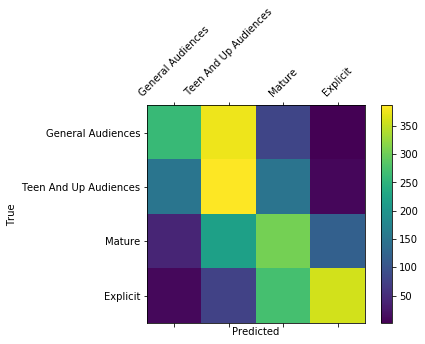

In [48]:
# confusion matrix for 4 classes

labels = ['General Audiences', 'Teen And Up Audiences', 'Mature', 'Explicit']

ytest = le.inverse_transform(Y_test.argmax(axis=1))
ypred = le.inverse_transform(ynew1.argmax(axis=1))
#print(ytest)

# confusion matrix with numerical values of y
cmn = confusion_matrix(Y_test.argmax(axis=1), ynew1.argmax(axis=1)) # true as rows and predicted as columns
print(cmn)

# confustion matrix with original labels of y (after using inverse_transform)
cm = confusion_matrix(ytest, ypred, labels)
print(cm)
print(ytest[1])

# plot the confusion matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
#plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)

tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
#ax.set_xticklabels([''] + labels)
#ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#plt.imshow(cm)
#plt.title('Confusion matrix of the classifier')
#plt.colorbar()
#plt.xlabel('Predicted')
#plt.ylabel('True')
#plt.show()

In [53]:
# building a combination of CNN and RNN
batch_size = 64
nb_filter = 256
filter_length = 5
hidden_dims = nb_filter * 2
nb_epoch = 6 # 60
RNN = GRU
rnn_output_size = 100
folds = 10

# maxlen = X_train.shape[1]
# max_features = len(W)
# embedding_dims = len(W[0])

def model3():
    main_input = Input(shape=(max_len, ), name='main_input') # dtype='int32'
    embedding = Embedding(max_words, 100, weights=[embedding_matrix], name='embedding', input_length=max_len)(main_input)
    #embedding  = Embedding(max_features, embedding_dims, weights=[np.matrix(W)], input_length=maxlen, name='embedding')(main_input)

    embedding = Dropout(0.50)(embedding)
    #embedding = Flatten()(embedding)

    conv4 = Conv1D(nb_filter, filter_length, border_mode='valid', subsample_length=1,
                   activation='relu', name='conv4')(embedding)
    maxConv4 = MaxPooling1D(2, name='maxConv4')(conv4)
    maxConv4 = Flatten()(maxConv4)

    conv5 = Conv1D(nb_filter, filter_length, border_mode='valid', subsample_length=1,
                   activation='relu', name='conv5')(embedding)
    maxConv5 = MaxPooling1D(2, name='maxConv5')(conv5)
    maxConv5= Flatten()(maxConv5)

    x = concatenate([maxConv4, maxConv5])
    x = Dropout(0.15)(x)

    #x = RNN(rnn_output_size)(x)

    x = Dense(hidden_dims, activation='relu', init='he_normal',
              W_constraint = maxnorm(3), b_constraint=maxnorm(3),
              name='mlp')(x)
    x = Dropout(0.10, name='drop')(x)
    output = Dense(4, init='he_normal', activation='softmax', name='output')(x)
    
    model = Model(input=main_input, output=output)
    return model


In [ ]:
# compile the combined model 3
model3 = model3()

model3.compile(loss={'output':'categorical_crossentropy'},
                optimizer=Adadelta(lr=0.95, epsilon=1e-06),
                metrics=["accuracy"])

# train the model
model3.fit(sequences_matrix, Y_train, batch_size=n_batch, epochs=n_epochs, validation_split=0.3, shuffle=True)

# evaluate
accr3 = model3.evaluate(test_sequences_matrix,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr3[0],accr3[1]))

C:\Users\chau0\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(256, 5, activation="relu", name="conv4", strides=1, padding="valid")`
C:\Users\chau0\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(256, 5, activation="relu", name="conv5", strides=1, padding="valid")`
C:\Users\chau0\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:40: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, activation="relu", name="mlp", kernel_initializer="he_normal", kernel_constraint=<keras.con..., bias_constraint=<keras.con...)`
C:\Users\chau0\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:42: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, activation="softmax", name="output", kernel_initializer="he_normal")`
C:\Users\chau0\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py

Train on 7898 samples, validate on 3386 samples
Epoch 1/10
5760/7898 [====================>.........] - ETA: 42s - loss: 11.8238 - acc: 0.2399

In [163]:
# compile the model and evaluaete by epoch 
accs = []
first_run = True
model3 = build_model()
if first_run:
    first_run = False
    print(model.summary())

best_val_acc = 0
best_test_acc = 0
for j in range(nb_epoch):
    a = time.time()
    his = model3.fit(sequences_matrix, Y_train,
                    batch_size=batch_size,
                    validation_data=[test_sequences_matrix, Y_test],
                    shuffle=True,
                    nb_epoch=1, verbose=1)
    print('Epoch %d/%d\t%s' % (j + 1, nb_epoch, str(his.history)))
    if his.history['val_acc'][0] >= best_val_acc:
        score, acc = model.evaluate(test_sequences_matrix, Y_test,
                                    batch_size=batch_size,
                                    verbose=2)
        best_val_acc = his.history['val_acc'][0]
        best_test_acc = acc
        print('Got best epoch  best val acc is %f test acc is %f' %
              (best_val_acc, best_test_acc))
        if len(accs) > 0:
            print('Current avg test acc:', str(np.mean(accs)))
    b = time.time()
    cost = b - a
    left = (nb_epoch - j - 1)
    print('One round cost %ds, %d round %ds %dmin left' % (cost, left,
                                                           cost * left,
                                                           cost * left / 60.0))
accs.append(best_test_acc)
print('Avg test acc:', str(np.mean(accs)))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 220)               0         
_________________________________________________________________
embedding_40 (Embedding)     (None, 220, 100)          6508300   
_________________________________________________________________
conv1d_83 (Conv1D)           (None, 216, 256)          128256    
_________________________________________________________________
max_pooling1d_83 (MaxPooling (None, 43, 256)           0         
_________________________________________________________________
conv1d_84 (Conv1D)           (None, 39, 256)           327936    
_________________________________________________________________
max_pooling1d_84 (MaxPooling (None, 19, 256)           0         
_________________________________________________________________
conv1d_85 (Conv1D)           (None, 15, 256)           327936    
__________

C:\Users\chau0\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  app.launch_new_instance()


11284/11284 [==============================] - 330s 29ms/step - loss: 1.1030 - acc: 0.4942 - val_loss: 1.1862 - val_acc: 0.4486
Epoch 1/6	{'val_loss': [1.186197242273835], 'val_acc': [0.44861800143855585], 'loss': [1.1029726549988308], 'acc': [0.49423963135753446]}
Got best epoch  best val acc is 0.448618 test acc is 0.467399
One round cost 336s, 5 round 1682s 28min left
Train on 11284 samples, validate on 2822 samples
Epoch 1/1


C:\Users\chau0\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  app.launch_new_instance()


11284/11284 [==============================] - 353s 31ms/step - loss: 1.0187 - acc: 0.5475 - val_loss: 1.2314 - val_acc: 0.4093
Epoch 2/6	{'val_loss': [1.231434420015185], 'val_acc': [0.40928419560595325], 'loss': [1.0186979111438523], 'acc': [0.5475008861894347]}
One round cost 352s, 4 round 1410s 23min left
Train on 11284 samples, validate on 2822 samples
Epoch 1/1


C:\Users\chau0\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  app.launch_new_instance()


11284/11284 [==============================] - 359s 32ms/step - loss: 0.9256 - acc: 0.6027 - val_loss: 1.2222 - val_acc: 0.4288
Epoch 3/6	{'val_loss': [1.2221738057809042], 'val_acc': [0.42877391922735814], 'loss': [0.9256153778588675], 'acc': [0.6027118043247075]}
One round cost 358s, 3 round 1076s 17min left
Train on 11284 samples, validate on 2822 samples
Epoch 1/1


C:\Users\chau0\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  app.launch_new_instance()


11284/11284 [==============================] - 365s 32ms/step - loss: 0.8112 - acc: 0.6582 - val_loss: 1.3013 - val_acc: 0.4298
Epoch 4/6	{'val_loss': [1.3012992471857834], 'val_acc': [0.42983699503897943], 'loss': [0.8112055211361314], 'acc': [0.6581885856501982]}
One round cost 365s, 2 round 730s 12min left
Train on 11284 samples, validate on 2822 samples
Epoch 1/1


C:\Users\chau0\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  app.launch_new_instance()


11284/11284 [==============================] - 362s 32ms/step - loss: 0.6996 - acc: 0.7146 - val_loss: 1.4020 - val_acc: 0.4302
Epoch 5/6	{'val_loss': [1.4019842516607126], 'val_acc': [0.4301913536498937], 'loss': [0.6995882927336113], 'acc': [0.7146401985322952]}
One round cost 361s, 1 round 361s 6min left
Train on 11284 samples, validate on 2822 samples
Epoch 1/1


C:\Users\chau0\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  app.launch_new_instance()


11284/11284 [==============================] - 375s 33ms/step - loss: 0.5660 - acc: 0.7777 - val_loss: 1.5562 - val_acc: 0.3997
Epoch 6/6	{'val_loss': [1.5561643234809859], 'val_acc': [0.39971651313239004], 'loss': [0.5659984489866539], 'acc': [0.7777383906627453]}
One round cost 374s, 0 round 0s 0min left
Avg test acc: 0.4673990078170109
